### Predicting MLB Player Salaries: A Batting Performance Analysis

Author: Hector Guerrero

---
### Exploratory Data Analysis
## Understanding Salary Determinants: An EDA of Performance Metrics and Player Earnings

---

### Project Overview

In this project, "Predicting MLB Player Salaries: A Batting Performance Analysis," we aim to build a model that accurately predicts Major League Baseball player salaries. However, before we delve into model building, we need to explore and understand the data we have.

### Table of Contents

1. [Introduction to EDA](#Introduction-to-EDA)
2. [Dataset Exploration](#Dataset-Exploration)
    - [2.1 Dataset Dictionary](#2.1-Dataset-Dictionary)
    - [2.2 Dataset Overview](#2.2-Dataset-Overview) 
3. [Exploring Salary in the MLB](#salary)
4. [Exploring Player Demographics](#player-demographics)
5. [Exploring Key Performance Metrics](#key-performance-metrics)
6. [Relationship Between Salary and Demographics](#salary-demographics)
7. [Relationship Between Salary and Performance Metrics](#salary-performance-metrics)
8. [References](#References)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

---

## 1. Introduction to EDA

Major League Baseball (MLB) is a multi-billion dollar industry that continues to grow year after year. In 2022, MLB set a new revenue record, exceeding $10.8 billion1, and the average player salary rose 14.8% to a record $4.22 million2. Despite this significant economic growth, questions remain about the distribution of salaries among MLB players.

In this analysis, we aim to uncover what is behind a player's salary in terms of batting performance. Is a player's monetary value truly reflective of their performance on the field? Does a higher team payroll translate into more wins? Furthermore, is the distribution of salaries fair among players, or are there instances of players being overpaid or underpaid?

Through the lens of data, we will explore these questions and more, diving deep into player salaries, key batting statistics, and performance metrics. By doing so, we aim to better understand the factors that contribute to a player's salary and, ultimately, their perceived value within the MLB.

Our exploration is not only interesting from a sports perspective, but it also has implications for player contract negotiations, budget planning, fairness and transparency, business strategy, and player retention. With the increase in MLB revenues and the escalating player salaries, this analysis is more relevant than ever.

In this notebook, we will be conducting an Exploratory Data Analysis (EDA) on our preprocessed Major League Baseball (MLB) player salaries dataset.

Our dataset comprises a variety of player details, including demographics, batting statistics, and, importantly, salary information. Our primary goal is to delve into this dataset, tease out interesting findings, and perhaps most critically, understand the factors that influence player salaries.

Given that our end goal is to predict player salaries, this EDA will not only provide valuable context and insights but also guide us in selecting appropriate features for our predictive model.



---

## 2. Dataset Exploration

To begin the analysis, we will explore the dataset to understand its structure and content.

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# load data
df = pd.read_csv("baseballsalaries.csv")

__Shape__

In [3]:
# shape of dataset
print('Shape of dataset: ', df.shape)
print('Number of rows (Players/season): ', df.shape[0])
print('Number of columns (Features): ', df.shape[1])


Shape of dataset:  (22010, 68)
Number of rows (Players/season):  22010
Number of columns (Features):  68


The dataset has a shape of **(22010, 68)**, indicating __22,010 rows (Players) and 68 columns (Features)__. 

Here are the first five rows of the dataset:

In [4]:
# First 5 rows of dataset
df.head()

playerID  name_common  BirthYear  debut_year  finalGame_year   age  \
0  bumbral01    Al Bumbry     1947.0        1972            1985  38.0   
1  chambal01  Al Chambers     1961.0        1983            1985  24.0   
2  cowenal01    Al Cowens     1951.0        1974            1986  33.0   
3  newmaal01    Al Newman     1960.0        1985            1992  25.0   
4  oliveal01    Al Oliver     1946.0        1968            1985  38.0   

   weight  height bats throws POS    Year  GamesPlayer     PA   AB_p  \
0   170.0    68.0    L      R  OF  1985.0         68.0  103.0   95.0   
1   217.0    76.0    L      L  OF  1985.0          4.0    4.0    4.0   
2   197.0    73.0    R      R  OF  1985.0        122.0  487.0  452.0   
3   175.0    69.0    B      R  2B  1985.0         25.0   32.0   29.0   
4   195.0    72.0    L      L  OF  1985.0         96.0  280.0  266.0   

   qualified   R_p    H_p    1B  2B_p  3B_p  HR_p   RBI  SB_p  CS_p  BB_p  \
0          0   6.0   19.0  15.0   3.0   0.0   1.0  10.0   2.0   0.0   7.0   
1          0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2          0  59.0  120.0  69.0  32.0   5.0  14.0  69.0   0.0   0.0  30.0   
3          0   7.0    5.0   4.0   1.0   0.0   0.0   1.0   2.0   1.0   3.0   
4          0  21.0   67.0  50.0  11.0   1.0   5.0  31.0   1.0   0.0  12.0   

   SO_p  IBB     BA    OBP    SLG    OPS  BABIP     TB    Inn   WAR  \
0   9.0  0.0  0.200  0.255  0.263  0.518  0.212   25.0  100.0 -0.18   
1   2.0  0.0  0.000  0.000  0.000  0.000  0.000    0.0    0.0  0.00   
2  56.0  3.0  0.265  0.310  0.451  0.761  0.275  204.0  978.0  0.61   
3   4.0  0.0  0.172  0.250  0.207  0.457  0.200    6.0   85.0 -0.25   
4  24.0  2.0  0.252  0.286  0.357  0.643  0.261   95.0  657.0 -1.11   

   CareerGames  career_PA  CareerAB  Career_R  Career_H  career_1B  Career_2B  \
0         1496       5619      5053       778      1422       1096        220   
1           57        141       120        15        25         19          4   
2         1556       5951      5452       699      1479       1031        272   
3           25         32        29         7         5          4          1   
4         2368       9778      9049      1189      2743       1918        529   

   Career_3B  Career_HR  career_RBI  Career_SB  Career_CS  Career_BB  \
0         52         54         402        254         92        471   
1          0          2          11          2          2         21   
2         68        108         711        119         74        386   
3          0          0           1          2          1          3   
4         77        219        1326         84         64        535   

   Career_SO  Career_IBB  career_TB  career_WAR  career_BA  career_OBP  \
0        709          30       1908       24.48      0.281       0.343   
1         34           1         35       -0.38      0.208       0.326   
2        641          28       2211       16.17      0.271       0.321   
3          4           0          6       -0.25      0.172       0.250   
4        756         119       4083       43.62      0.303       0.344   

   career_SLG  career_OPS  career_BABIP              teamName  Rank      G  \
0       0.378       0.721         0.317      San Diego Padres   3.0  162.0   
1       0.292       0.618         0.274      Seattle Mariners   6.0  162.0   
2       0.406       0.727         0.288      Seattle Mariners   6.0  162.0   
3       0.207       0.457         0.200  Washington Nationals   3.0  161.0   
4       0.451       0.795         0.309   Los Angeles Dodgers   1.0  162.0   

      W     L     W%  DivWin  LgWin  WSWin  adjusted_salary  
0  83.0  79.0  0.512       0      0      0         462400.0  
1  74.0  88.0  0.457       0      0      0         173400.0  
2  74.0  88.0  0.457       0      0      0        1156000.0  
3  84.0  77.0  0.522       0      0      0         173400.0  
4  95.0  67.0  0.586       1      0      0        2167500.0

__Data Types__

In [5]:
# dtypes of dataset
df.dtypes

playerID            object
name_common         object
BirthYear          float64
debut_year           int64
finalGame_year       int64
age                float64
weight             float64
height             float64
bats                object
throws              object
POS                 object
Year               float64
GamesPlayer        float64
PA                 float64
AB_p               float64
qualified            int64
R_p                float64
H_p                float64
1B                 float64
2B_p               float64
3B_p               float64
HR_p               float64
RBI                float64
SB_p               float64
CS_p               float64
BB_p               float64
SO_p               float64
IBB                float64
BA                 float64
OBP                float64
SLG                float64
OPS                float64
BABIP              float64
TB                 float64
Inn                float64
WAR                float64
CareerGames          int64
c

In [6]:
# # change debut and finalGame to datetime
# df['debut'] = pd.to_datetime(df['debut'])
# df['finalGame'] = pd.to_datetime(df['finalGame'])

### 2.1 Dictionary of features

| Feature | Type | Description |
| --- | --- | --- |
| playerID | Categorical | Unique identifier for each player |
| name_common | Categorical | Player's name |
| BirthYear | Numerical | Player's birth year |
| debut_year | Categorical | Player's debut year |
| finalGame_year | Categorical | Player's final game year |
| age | Numerical | Player's age at the end of the season |
| weight | Numerical | Player's weight in pounds |
| height | Numerical | Player's height in inches |
| bats | Categorical | Player's batting hand (L, R, or B) |
| throws | Categorical | Player's throwing hand (L or R) |
| POS | Categorical | Player's primary position |
| Year | Numerical | Year of the season |
| GamesPlayer | Numerical | Player's Games played |
| PA | Numerical | Player's Plate appearances |
| qualified | Numerical | Qualified batter |
| AB_P | Numerical | Player's At bats |
| R_p | Numerical | Player's Runs scored |
| H_p | Numerical | Player's Hits |
| 1B | Numerical | Player's Singles |
| 2B_p | Numerical | Player's Doubles |
| 3B_p | Numerical | Player's Triples |
| HR_p | Numerical | Player's Home runs |
| RBI | Numerical | Player's Runs batted in |
| SB_p | Numerical | Player's Stolen bases |
| CS_p | Numerical | Player's Caught stealing |
| BB_p | Numerical | Player's Walks |
| SO_p | Numerical | Player's Strikeouts |
| IBB | Numerical | Player's Intentional walks ||
| BA | Numerical | Player's Batting average |
| OBP | Numerical | Player's On-base percentage |
| SLG | Numerical | Player's Slugging percentage |
| OPS | Numerical | Player's On-base plus slugging percentage |
| BABIP | Numerical | Player's Batting average on balls in play |
| TB | Numerical | Player's Total bases |
| W% | Numerical | Team's Win percentage |
| Inn | Numerical | Player's Innings played |
| WAR | Numerical | Player's Wins above replacement |
| CareerGames | Numerical | Player's Career games played |
| career_PA | Numerical | Player's Career plate appearances |
| careerAB | Numerical | Player's Career at bats |
| career_R | Numerical | Player's Career runs scored |
| career_H | Numerical | Player's Career hits |
| career_1B | Numerical | Player's Career singles |
| career_2B | Numerical | Player's Career doubles |
| career_3B | Numerical | Player's Career triples |
| career_HR | Numerical | Player's Career home runs |
| career_RBI | Numerical | Player's Career runs batted in |
| career_SB | Numerical | Player's Career stolen bases |
| career_CS | Numerical | Player's Career caught stealing |
| career_BB | Numerical | Player's Career walks |
| career_SO | Numerical | Player's Career strikeouts |
| career_IBB | Numerical | Player's Career intentional walks |
| career_TB | Numerical | Player's Career total bases |
| career_WAR | Numerical | Player's Career wins above replacement |
| career_BA | Numerical | Player's Career batting average |
| career_OBP | Numerical | Player's Career on-base percentage |
| career_SLG | Numerical | Player's Career slugging percentage |
| career_OPS | Numerical | Player's Career on-base plus slugging percentage |
| career_BABIP | Numerical | Player's Career batting average on balls in play |
| teamName | Categorical | Team name |
| G | Numerical | Team games played |
| W | Numerical | Team wins |
| L | Numerical | Team losses |
| W% | Numerical | Team wins percentage |
| DivWin | Categorical | Division winner (Y or N) |
| LgWin | Categorical | League winner (Y or N) |
| WSWin | Categorical | World Series winner (Y or N) |
| adjusted_salary | Numerical | Player's salary adjusted for inflation |









### 2.2 Dataset Overview

In [7]:
# Unique players
print('Number of unique players: ', df['playerID'].nunique())

# Unique teams
print('Number of unique teams: ', df['teamName'].nunique())

# Unique number of seasons
print('Number of unique seasons: ', df['Year'].nunique())

# First season
print('First season: ', df['Year'].min())

# Last season
print('Last season: ', df['Year'].max())

Number of unique players:  3819
Number of unique teams:  30
Number of unique seasons:  37
First season:  1985.0
Last season:  2021.0


Our dataset is a comprehensive compilation of Major League Baseball (MLB) player statistics and salaries that contains data for __3,819 unique players across 37 seasons__. The earliest MLB season in the dataset is 1985, and the latest season is 2021.

Each row in the dataset represents a single player's performance for a given season, with a variety of metrics reflecting different aspects of their performance. These are divided into the following categories:

- __Identifiers__: These include unique IDs for players, teams, and leagues, as well as the year and player's stint with the team in that season.
- __Demographics__: These include the player's name, birth year, birth country, debut year, final game year, age, weight, height, batting hand, throwing hand, and primary position.
- __Batting statistics__: These encompass both basic and advanced batting statistics, including games played, plate appearances, at bats, runs scored, hits, singles, doubles, triples, home runs, runs batted in, stolen bases, caught stealing, walks, strikeouts, intentional walks, hit by pitch, sacrifice hits, sacrifice flies, grounded into double plays, batting average, on-base percentage, slugging percentage, on-base plus slugging percentage, batting average on balls in play, total bases, adjusted OPS, and wins above replacement.
- __Team statistics__: These include the team's name, attendance, ID, league, franchise, division, rank, games played, home games played, wins, losses, division winner, league winner, World Series winner, runs scored, at bats, hits, doubles, triples, home runs, walks, strikeouts, stolen bases, caught stealing, hit by pitch, sacrifice flies, runs allowed, errors, double plays, fielding percentage, and ballpark factor.
- __Salary information__: These include the player's salary, the average salary of all players in the league, the league minimum salary, and the player's salary adjusted for inflation.

This dataset provides a comprehensive view of MLB player performance and salaries, allowing us to examine the factors influencing player salaries from multiple perspectives. With this rich dataset, we aim to extract intriguing insights and build a robust predictive model for player salaries.

#### Sanity Checks

Even though this is a preprocessed and cleaned dataset, we will still perform some sanity checks to ensure that the data is in the expected format and that there are no missing or duplicated values.

In [8]:
# Null values
df.isnull().sum().sum()

0

In [9]:
# Duplicate rows
df.duplicated().sum().sum()

0

In [10]:
# Jim Dwyer
df[df['playerID'] == 'dwyerji01']

playerID name_common  BirthYear  debut_year  finalGame_year   age  \
244   dwyerji01   Jim Dwyer     1950.0        1973            1990  35.0   
770   dwyerji01   Jim Dwyer     1950.0        1973            1990  36.0   
1296  dwyerji01   Jim Dwyer     1950.0        1973            1990  37.0   
1840  dwyerji01   Jim Dwyer     1950.0        1973            1990  38.0   
2382  dwyerji01   Jim Dwyer     1950.0        1973            1990  39.0   
2920  dwyerji01   Jim Dwyer     1950.0        1973            1990  40.0   

      weight  height bats throws POS    Year  GamesPlayer     PA   AB_p  \
244    165.0    70.0    L      L  OF  1985.0        101.0  274.0  233.0   
770    165.0    70.0    L      L  OF  1986.0         94.0  189.0  160.0   
1296   165.0    70.0    L      L  OF  1987.0         92.0  281.0  241.0   
1840   165.0    70.0    L      L  OF  1988.0         55.0  122.0   94.0   
2382   165.0    70.0    L      L  OF  1989.0        101.0  265.0  235.0   
2920   165.0    70.0    L      L  OF  1990.0         37.0   75.0   63.0   

      qualified   R_p   H_p    1B  2B_p  3B_p  HR_p   RBI  SB_p  CS_p  BB_p  \
244           0  35.0  58.0  40.0   8.0   3.0   7.0  36.0   0.0   3.0  37.0   
770           0  18.0  39.0  17.0  13.0   1.0   8.0  31.0   0.0   2.0  23.0   
1296          0  54.0  66.0  43.0   7.0   1.0  15.0  33.0   4.0   1.0  37.0   
1840          0   9.0  24.0  21.0   1.0   0.0   2.0  18.0   0.0   0.0  25.0   
2382          0  35.0  74.0  59.0  12.0   0.0   3.0  25.0   2.0   0.0  29.0   
2920          0   7.0  12.0  11.0   0.0   0.0   1.0   5.0   0.0   0.0  12.0   

      SO_p  IBB     BA    OBP    SLG    OPS  BABIP     TB    Inn   WAR  \
244   31.0  2.0  0.249  0.353  0.399  0.752  0.260   93.0  525.0  1.08   
770   31.0  1.0  0.244  0.339  0.488  0.827  0.248   78.0  346.7  0.65   
1296  57.0  4.0  0.274  0.371  0.498  0.869  0.300  120.0  606.3  1.49   
1840  19.0  4.0  0.255  0.410  0.330  0.740  0.293   31.0  275.0  0.29   
2382  24.0  1.0  0.315  0.389  0.404  0.793  0.340   95.0  658.0  0.83   
2920   7.0  1.0  0.190  0.320  0.238  0.558  0.200   15.0  201.0 -0.44   

      CareerGames  career_PA  CareerAB  Career_R  Career_H  career_1B  \
244           949       2302      1968       286       504        359   
770          1043       2491      2128       304       543        376   
1296         1135       2772      2369       358       609        419   
1840         1190       2894      2463       367       633        440   
2382         1291       3159      2698       402       707        499   
2920         1328       3234      2761       409       719        510   

      Career_2B  Career_3B  Career_HR  career_RBI  Career_SB  Career_CS  \
244          82         15         48         237         20         12   
770          95         16         56         268         20         14   
1296        102         17         71         301         24         15   
1840        103         17         73         319         24         15   
2382        115         17         76         344         26         15   
2920        115         17         77         349         26         15   

      Career_BB  Career_SO  Career_IBB  career_TB  career_WAR  career_BA  \
244         276        264          23        760        3.21      0.256   
770         299        295          24        838        3.86      0.255   
1296        336        352          28        958        5.35      0.257   
1840        361        371          32        989        5.64      0.257   
2382        390        395          33       1084        6.47      0.262   
2920        402        402          34       1099        6.03      0.260   

      career_OBP  career_SLG  career_OPS  career_BABIP           teamName  \
244        0.346       0.386       0.732         0.271  Baltimore Orioles   
770        0.345       0.394       0.739         0.270  Baltimore Orioles   
1296       0.348       0.404       0.752         0.272  Baltimore Orioles

---

## 3. Exploring Salary in the MLB <a id='salary'></a>
In this section, we delve into the financial side of Major League Baseball, focusing primarily on player salaries. Player salaries are a crucial part of our analysis, as they are the primary variable of interest.

By understanding the landscape of player salaries in the MLB, we can gain insights into the monetary value attributed to players and how it correlates with their performance metrics. This foundational knowledge is crucial for our subsequent analysis and for building a predictive model of player salaries.

#### Salaries over time

This section delves into the evolution of player salaries over time. An important facet of our exploration, it provides context to the economic landscape of Major League Baseball across the years. By examining the trajectory of average salaries, we gain insights into broader trends and patterns.

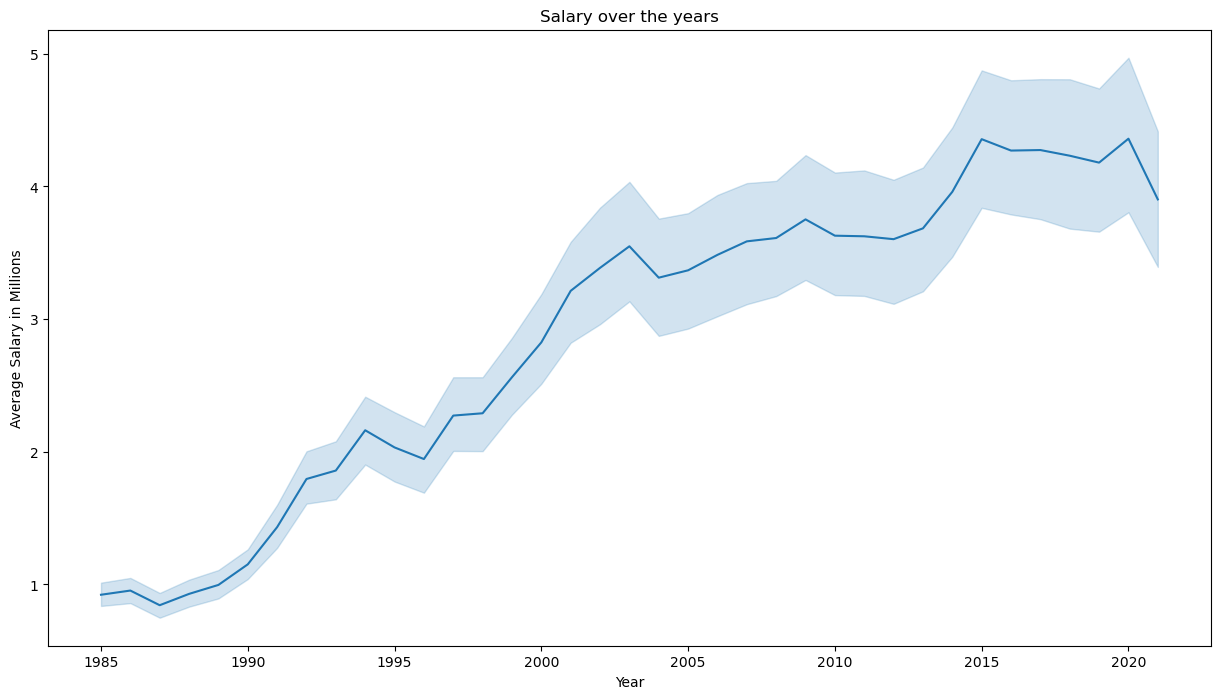

In [11]:
# Line plot of salary over the years until 2021
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y=df['adjusted_salary']/1_000_000, data=df)
plt.title('Salary over the years')
plt.xlabel('Year')
plt.ylabel('Average Salary in Millions')
plt.show()


A clear upward trajectory is observed, indicating that player salaries have generally increased over the time period covered by our dataset. This trend is an important aspect of our analysis, as it provides context for understanding individual player salaries.

Starting from an average of approximately $929,054.5 in 1985, the salaries have seen a substantial increase, reaching about $3,902,404.00 in 2021.

#### Highest Paid Players

In any professional sport, a handful of top players often command salaries that dwarf those of their peers. In the MLB, where player performance can significantly influence a team's success, the highest-paid players are typically those who have proven their worth on the field.

In this section, we will identify the players with the highest salaries in our dataset. This analysis will give us an insight into who the top earners are and how their remuneration compares to the rest of the players.

In [12]:
# Create a dictionary that maps playerID to name_common
player_name = dict(zip(df['playerID'], df['name_common']))

C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_24396\1107490944.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


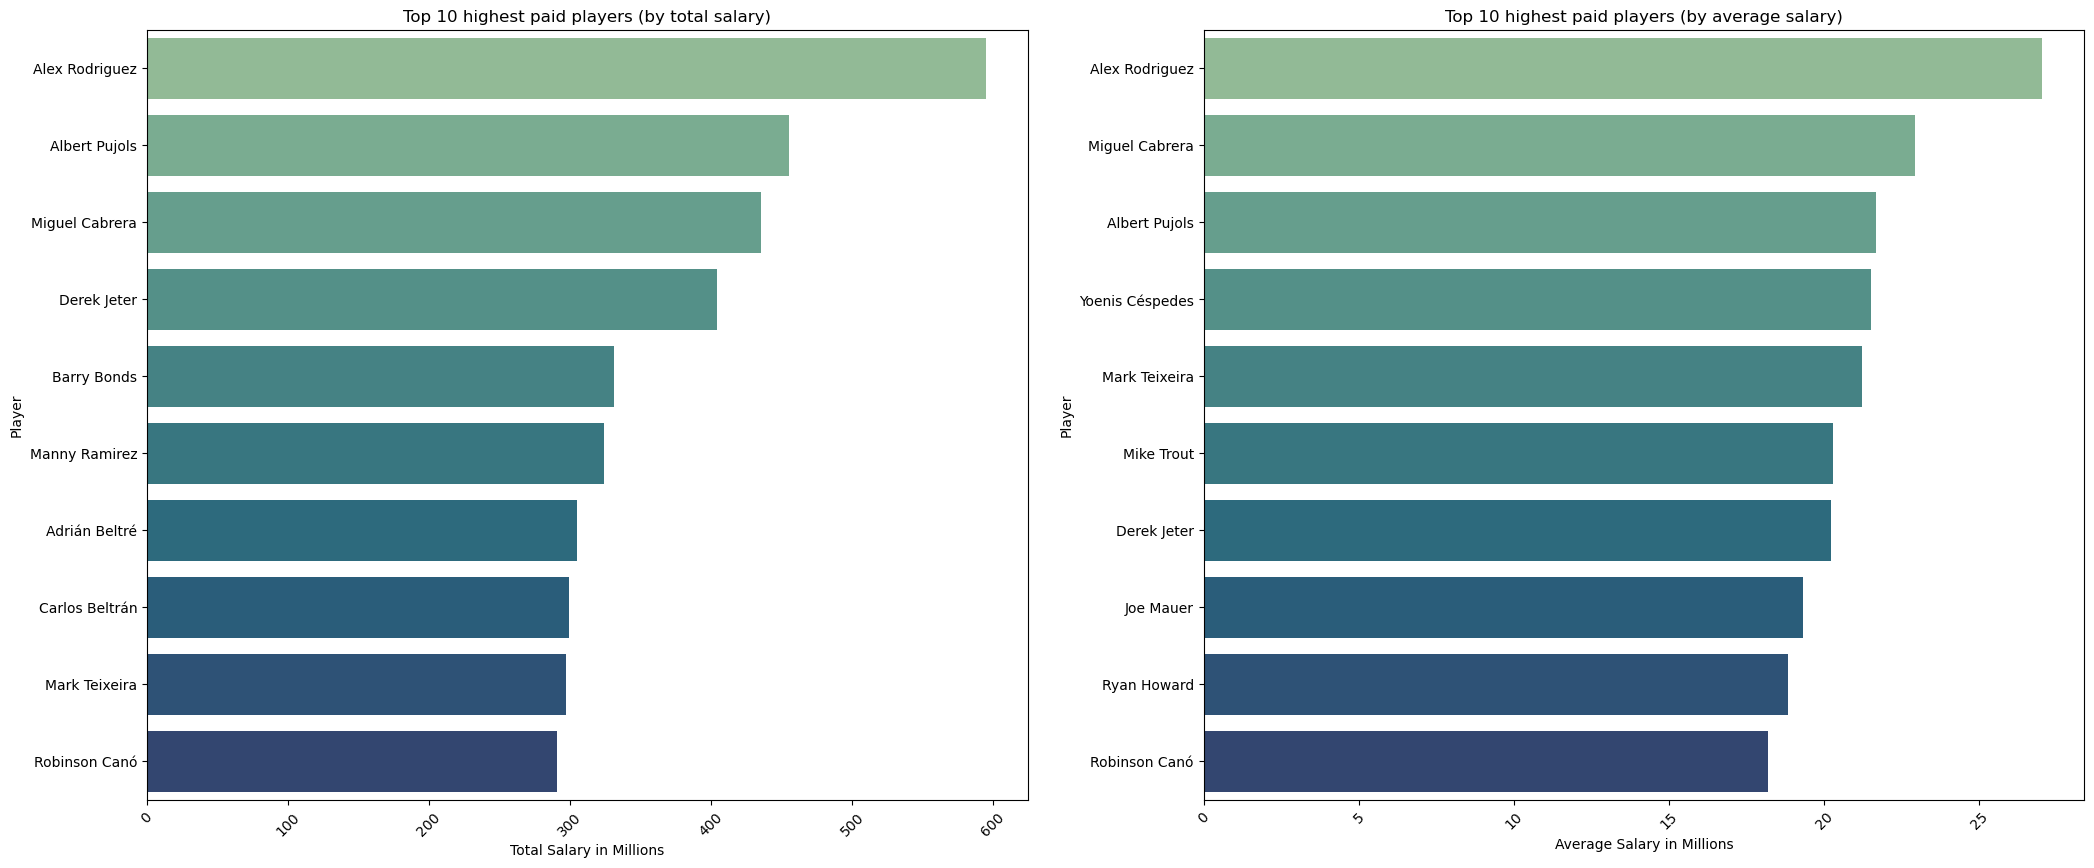

In [13]:
# Top 10 highest paid players (by total salary)
top_10_p = df.groupby('playerID')['adjusted_salary'].sum().sort_values(ascending=False).head(10)

# Top 10 highest paid players (by average salary)
top_10_p_avg = df.groupby('playerID')['adjusted_salary'].mean().sort_values(ascending=False).head(10)

# Plot of top 10 highest paid players
plt.subplots(figsize=(25, 10))

plt.subplot(1, 2, 1)
sns.barplot(y=[player_name[i] for i in top_10_p.index], x=top_10_p.values/1_000_000, orient='h', palette='crest')
plt.title('Top 10 highest paid players (by total salary)')
plt.xlabel('Total Salary in Millions')
plt.ylabel('Player')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(y=[player_name[i] for i in top_10_p_avg.index], x=top_10_p_avg.values/1_000_000, orient='h', palette='crest')
plt.title('Top 10 highest paid players (by average salary)')
plt.xlabel('Average Salary in Millions')
plt.ylabel('Player')
plt.xticks(rotation=45)
plt.show()


In [14]:
# Print top 10 highest paid players (by total salary)
print('Top 10 highest paid players (by total salary)')
for i in top_10_p.index:
    print(player_name[i], ': ', round(top_10_p[i]/1_000_000, 2), 'Million')

print('\n')

print('Top 10 highest paid players (by average salary)')
for i in top_10_p_avg.index:
    print(player_name[i], ': ', round(top_10_p_avg[i]/1_000_000, 2), 'Million')

Top 10 highest paid players (by total salary)
Alex Rodriguez :  594.73 Million
Albert Pujols :  455.11 Million
Miguel Cabrera :  435.28 Million
Derek Jeter :  404.33 Million
Barry Bonds :  331.21 Million
Manny Ramirez :  324.18 Million
Adrián Beltré :  305.2 Million
Carlos Beltrán :  299.34 Million
Mark Teixeira :  297.14 Million
Robinson Canó :  290.87 Million


Top 10 highest paid players (by average salary)
Alex Rodriguez :  27.03 Million
Miguel Cabrera :  22.91 Million
Albert Pujols :  21.67 Million
Yoenis Céspedes :  21.52 Million
Mark Teixeira :  21.22 Million
Mike Trout :  20.29 Million
Derek Jeter :  20.22 Million
Joe Mauer :  19.3 Million
Ryan Howard :  18.82 Million
Robinson Canó :  18.18 Million


The plot on the left shows the top 10 players by total salary accumulated throughout their careers. This gives us an insight into the total compensation these players have received over their playing time in the MLB.

The plot on the right displays the top 10 highest paid players by average annual salary. This gives us a perspective on the yearly compensation these players receive on average, which can be a more relevant metric when comparing players who have different lengths of careers.

#### Highest Payroll Teams

C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_24396\2634689253.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


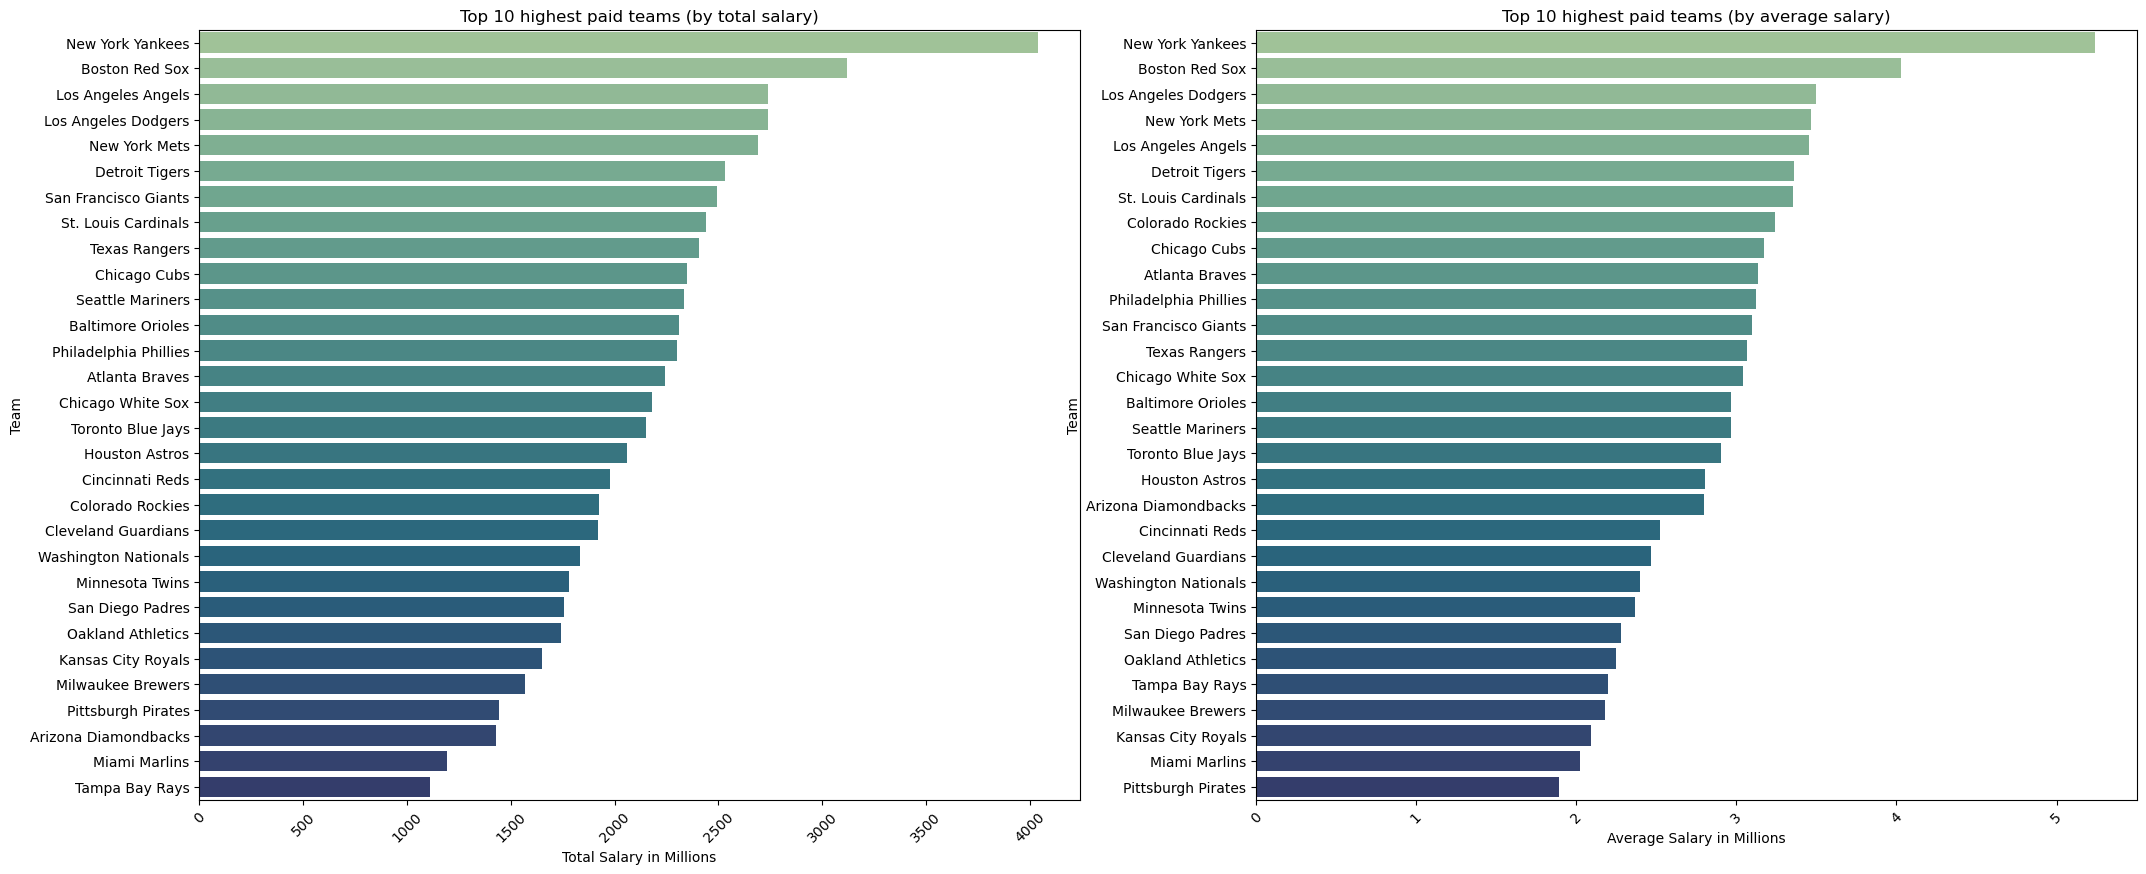

In [15]:
# Top highest paid teams (by total salary)
top_10_t = df.groupby('teamName')['adjusted_salary'].sum().sort_values(ascending=False)

# Top highest paid teams (by average salary)
top_10_t_avg = df.groupby('teamName')['adjusted_salary'].mean().sort_values(ascending=False)

# Plot of top 10 highest paid teams
plt.subplots(figsize=(25, 10))

plt.subplot(1, 2, 1)
sns.barplot(y=top_10_t.index, x=top_10_t.values/1_000_000, orient='h', palette='crest')
plt.title('Top 10 highest paid teams (by total salary)')
plt.xlabel('Total Salary in Millions')
plt.ylabel('Team')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(y=top_10_t_avg.index, x=top_10_t_avg.values/1_000_000, orient='h', palette='crest')
plt.title('Top 10 highest paid teams (by average salary)')
plt.xlabel('Average Salary in Millions')
plt.ylabel('Team')
plt.xticks(rotation=45)
plt.show()

In [16]:
print('Top 10 highest paid teams (by total salary)')
for i in top_10_t.index:
    print(i, ': ', round(top_10_t[i]/1_000_000, 2), 'Million')
    
print('\n')

print('Top 10 highest paid teams (by average salary)')
for i in top_10_t_avg.index:
    print(i, ': ', round(top_10_t_avg[i]/1_000_000, 2), 'Million')

Top 10 highest paid teams (by total salary)
New York Yankees :  4039.18 Million
Boston Red Sox :  3119.88 Million
Los Angeles Angels :  2736.73 Million
Los Angeles Dodgers :  2736.63 Million
New York Mets :  2691.35 Million
Detroit Tigers :  2530.72 Million
San Francisco Giants :  2495.04 Million
St. Louis Cardinals :  2441.71 Million
Texas Rangers :  2405.74 Million
Chicago Cubs :  2350.84 Million
Seattle Mariners :  2332.03 Million
Baltimore Orioles :  2309.2 Million
Philadelphia Phillies :  2300.5 Million
Atlanta Braves :  2240.42 Million
Chicago White Sox :  2181.39 Million
Toronto Blue Jays :  2152.31 Million
Houston Astros :  2059.41 Million
Cincinnati Reds :  1978.52 Million
Colorado Rockies :  1926.86 Million
Cleveland Guardians :  1919.16 Million
Washington Nationals :  1834.82 Million
Minnesota Twins :  1778.74 Million
San Diego Padres :  1755.01 Million
Oakland Athletics :  1742.5 Million
Kansas City Royals :  1652.67 Million
Milwaukee Brewers :  1567.39 Million
Pittsburgh P

The New York Yankees lead in both total salary and average salary paid, highlighting their high spending in player salaries. This is followed by the Boston Red Sox and the Los Angeles Angels in total salary expenditure, whereas the Washington Nationals and Los Angeles Dodgers follow in average salary paid.

It's important to consider that a high payroll doesn't necessarily translate into team success. Factors such as effective talent scouting, player development, and strategic management also play crucial roles in a team's performance.

The Montreal Expos, now defunct, appear at the bottom of the list, reflecting their lower financial capabilities during their existence. The Tampa Bay Rays and Miami Marlins, despite being active teams, also show relatively low total and average salary figures, indicating their smaller market size or different team strategies, such as focusing on young, less expensive talent.

Finally, it's worth noting that these figures are subject to various factors including team revenues, market size, and management strategies, among others.

#### Distribution of Player Salaries

The distribution of player salaries provides vital insights into the financial aspects of Major League Baseball. It can reveal patterns, such as whether most players earn similar salaries or if there are significant disparities.

Following visualizations will help us understand the shape of the salary distribution - is it skewed towards lower or higher salaries, or is it approximately symmetrical around the average?

By examining the distribution, we can also identify outliers: players who earn significantly more or less than most others. 

In [17]:
# Summary statistics of salary
df['adjusted_salary'].describe()

count    2.201000e+04
mean     2.928191e+06
std      5.158169e+06
min      7.250000e+04
25%      4.830000e+05
50%      6.703500e+05
75%      2.755000e+06
max      4.785000e+07
Name: adjusted_salary, dtype: float64

C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_24396\1416838587.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


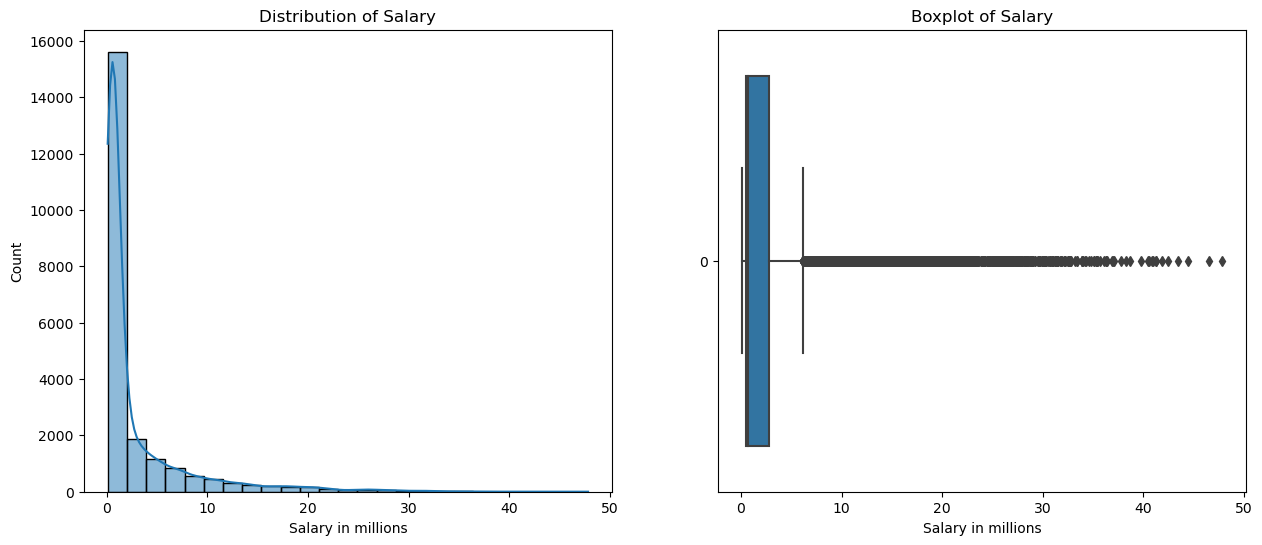

In [18]:
plt.subplots(figsize=(15, 6))

# Plot distribution of salary
plt.subplot(1, 2, 1)
sns.histplot((df['adjusted_salary']/1_000_000), kde=True, bins=25)
plt.title('Distribution of Salary')
plt.xlabel('Salary in millions')
plt.ylabel('Count')

# Boxplot of salary
plt.subplot(1, 2, 2)
sns.boxplot((df['adjusted_salary']/1_000_000), orient='h')
plt.title('Boxplot of Salary')
plt.xlabel('Salary in millions')

# Save figure
plt.savefig('salary_distribution.png')

plt.show()






From the summary statistics, we can see that the mean salary is approximately $2,928,191. However, the large standard deviation of approximately $5,158,169 indicates significant variation in player salaries. The median salary, which is the 50th percentile, is $673,500. This is lower than the mean, suggesting that the distribution is highly skewed to the right with some players earning significantly more than others.

The minimum salary in the dataset is $72,500, while the maximum is $47,850,000. The 25th percentile (the first quartile) is $483,000, and the 75th percentile (the third quartile) is $2,755,000. This indicates that 50% of the players earn between $483,000 and $2,755,000.

The histogram provides a visual representation of this information. It shows that a large number of players earn less than $1,000,000, with fewer players earning higher salaries. This is consistent with the summary statistics, which indicated that the distribution is skewed to the right.

##### Presence of High Salaries (Outliers)

The histogram and box plot reveal numerous high salaries, significantly larger than the median, which are considered outliers.
In the context of Major League Baseball, such high salaries are often attributed to star players who bring exceptional performance, popularity, and revenue to their teams, resulting in a right-skewed distribution.
Although these outliers could impact our analysis and models, they represent real-world salary dynamics in professional baseball and should not be disregarded. 
Later in our analysis, we will explore these outliers in more detail to understand the factors that influence them. 

## 4. Exploring Player Demographics <a id='player-demographics'> </a>

#### Distribution of Player Age

In [19]:
# Summary statistics of Age
df['age'].describe()

count    22010.000000
mean        28.236801
std          4.114660
min         18.000000
25%         25.000000
50%         28.000000
75%         31.000000
max         48.000000
Name: age, dtype: float64

C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_24396\3939218087.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


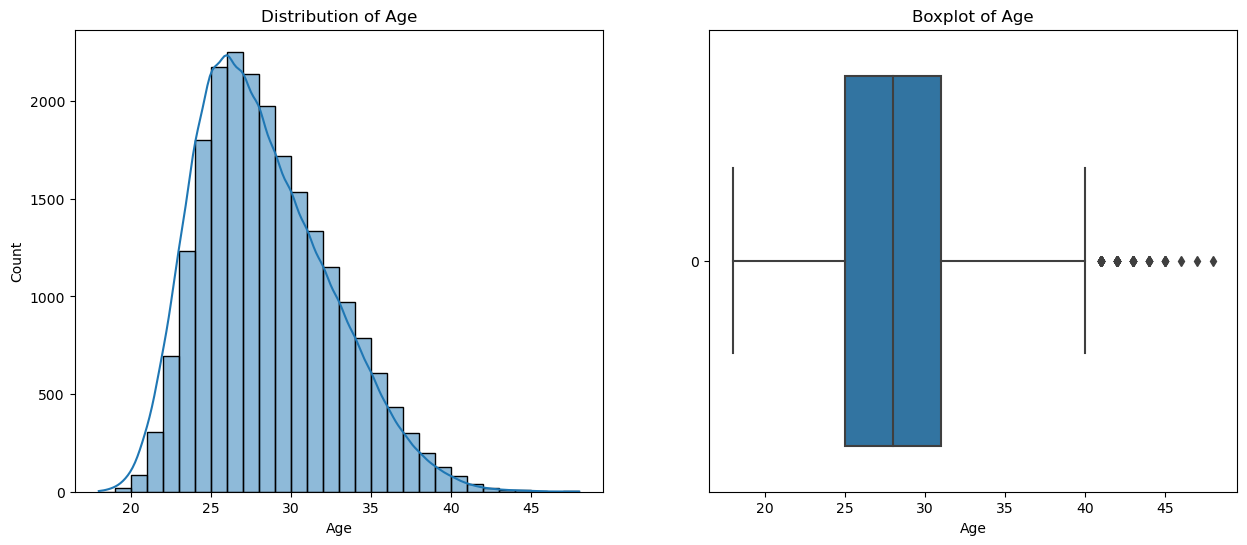

In [20]:
# Distribution of Age
plt.subplots(figsize=(15, 6))

# Plot distribution of age
plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Boxplot of age
plt.subplot(1, 2, 2)
sns.boxplot(df['age'], orient='h')
plt.title('Boxplot of Age')
plt.xlabel('Age')

plt.show()

The average age of MLB players in our dataset is approximately 28.24 years, with a standard deviation of 4.1 years. The ages range from 18 to 48 years, with 50% of players between 25 and 31 years old.

The histogram shows a is approximately normal (bell-shaped), with a peak around the late 20s, indicating fewer players in the older age range. This suggests that professional baseball predominantly involves relatively young athletes, with the majority in their late 20s to early 30s.


#### Player's Position

In baseball, a player's position is a significant aspect of their role and can greatly influence their performance statistics and, potentially, their salaries.

##### Distribution of Player's Position

In [21]:
# Position of players
df['POS'].value_counts()


OF    8438
C     3639
2B    2648
3B    2499
SS    2431
1B    2340
P       15
Name: POS, dtype: int64

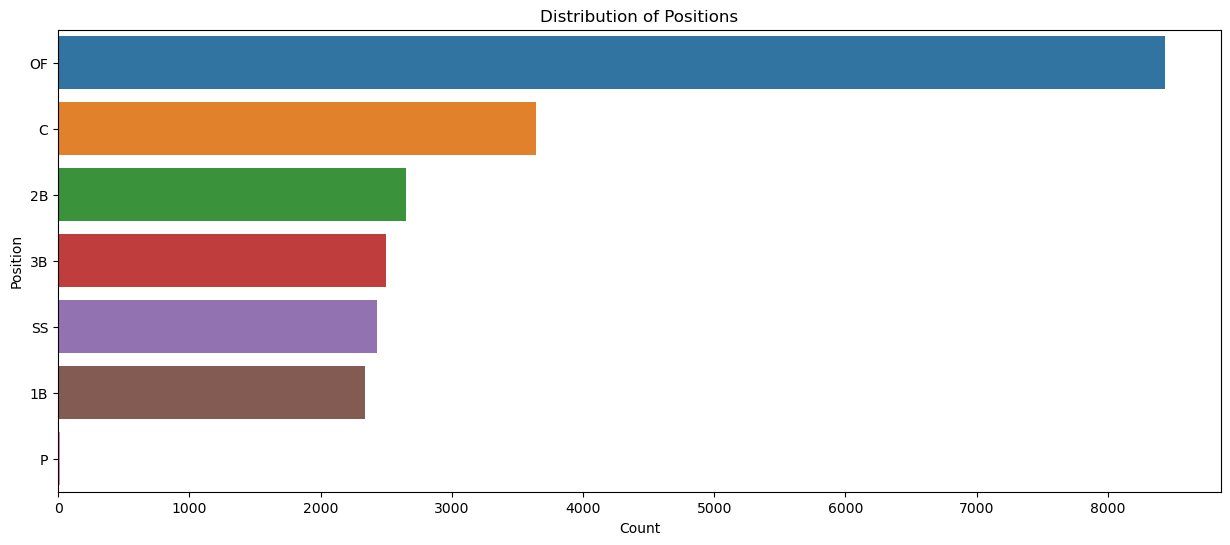

In [22]:
# Distribution of Positions
plt.figure(figsize=(15, 6))
sns.countplot(y='POS', data=df, order=df['POS'].value_counts().index)
plt.title('Distribution of Positions')
plt.xlabel('Count')
plt.ylabel('Position')
plt.show()


Our dataset includes seven unique positions: Outfielder (OF), Catcher (C), Second Base (2B), Third Base (3B), Shortstop (SS), First Base (1B), and Pitcher (P)
 
The most common position in the dataset is the Outfielder, followed by Catcher, Second Base, Third Base, Shortstop, and First Base. The least common position is the Pitcher.

This distribution can provide insights into the composition of the teams and the roles of the players. As we proceed with our analysis, we can explore how these positions correlate with other variables, such as salary and performance metrics.

#### Distribution of Player's Batting Hand

In baseball, a player's batting hand is a crucial aspect of their performance.

In [23]:
# Batter handedness
df['bats'].value_counts()

R    12080
L     6585
B     3345
Name: bats, dtype: int64

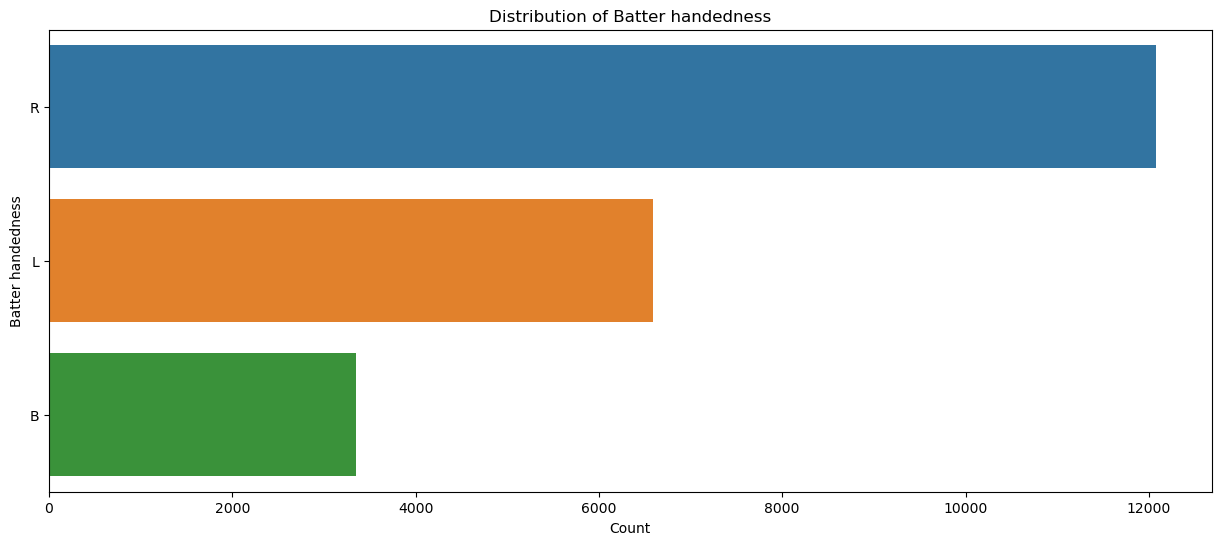

In [24]:
# Plot of Batter handedness
plt.figure(figsize=(15, 6))
sns.countplot(y='bats', data=df, order=df['bats'].value_counts().index)
plt.title('Distribution of Batter handedness')
plt.xlabel('Count')
plt.ylabel('Batter handedness')
plt.show()

In [25]:
# Percentage of batter handedness
df['bats'].value_counts(normalize=True)*100

R    54.884144
L    29.918219
B    15.197637
Name: bats, dtype: float64

The plot above shows the distribution of batting hand among players. This is a categorization of whether players bat with their left hand (L), right hand (R), or both (B). It can be seen that right-handed batters are most common, representing almost 55% of the players. Left-handed batters are the second most common, representing approximately 30% of the players. Switch hitters, who bat with both hands, are the least common, representing only 15% of the players.

## 5. Exploring Key Performance Metrics <a id='key-performance-metrics'></a>
In this section, we will be diving deep into the key performance metrics of MLB players. These metrics give us a quantifiable measure of how well a player performs in various aspects of the game, and are crucial in understanding a player's value.

We will be looking at metrics such as Batting Average (BA), On-Base Plus Slugging (OPS), and Wins Above Replacement (WAR). These metrics are often used by teams and analysts to evaluate player performance and are likely to be influential in determining player salaries. Additionally, we'll also delve into aspects of player consistency and longevity, as these factors can have a significant impact on a player's overall career and, in turn, their salary.

Through this exploration, we aim to understand the distribution of these metrics among players and identify trends and anomalies. The insights gained here will be valuable in our subsequent analysis and model building.



#### Batting Average (BA) (qualified hitters) 
The Batting Average (BA) is a crucial statistic in baseball, representing a player's hits divided by their at bats. A higher BA indicates a higher propensity for making successful hits, reflecting a player's offensive performance. In this section, we focus on the distribution of BA among qualified hitters only. This threshold ensures that the players analyzed have had a substantial amount of play during the season, providing a reliable sample for their performance.


In [26]:
# Summary statistics of BA for qualified batters
df[df['qualified'] == 1]['BA'].describe()

count    5305.000000
mean        0.277025
std         0.028089
min         0.168000
25%         0.258000
50%         0.276000
75%         0.295000
max         0.394000
Name: BA, dtype: float64

C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_24396\1889453189.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


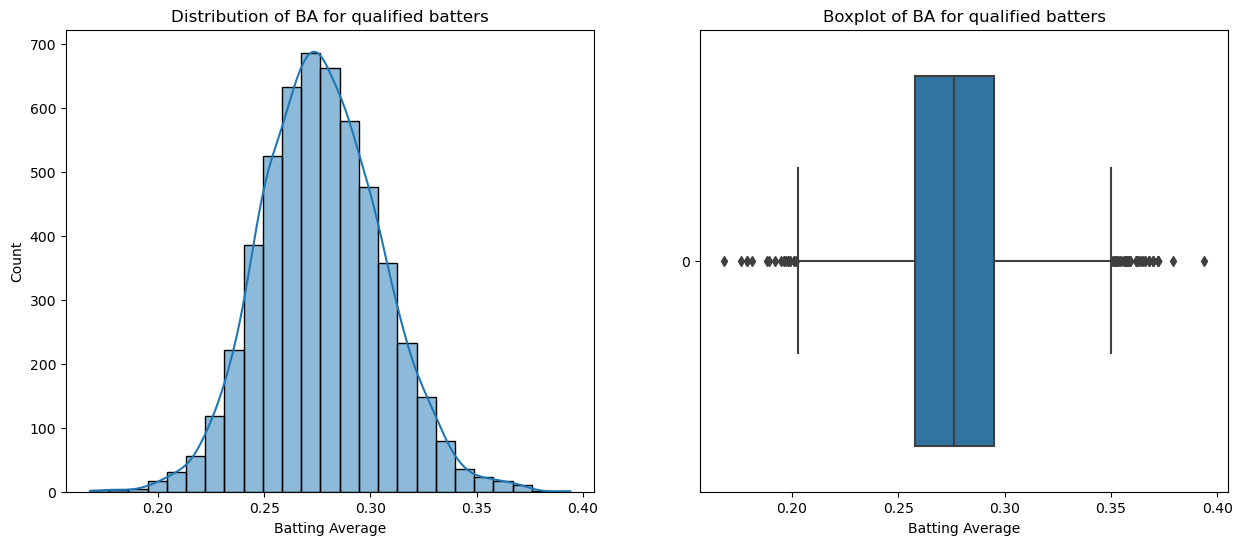

In [27]:
# Plot distribution of BA for qualified batters
plt.subplots(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[df['qualified'] == 1]['BA'], kde=True, bins=25)
plt.title('Distribution of BA for qualified batters')
plt.xlabel('Batting Average')
plt.ylabel('Count')

# Boxplot of BA for qualified batters
plt.subplot(1, 2, 2)
sns.boxplot(df[df['qualified'] == 1]['BA'].reset_index(drop=True), orient='h')
plt.title('Boxplot of BA for qualified batters')
plt.xlabel('Batting Average')

plt.show()

The average batting average of the qualified hitters is approximately 0.277.

From the histogram, we can see that the distribution of batting averages among qualified hitters is roughly normal, with a peak around 0.276. This is expected as the batting average, typically ranges from 0.200 (considered acceptable) to 0.300 (considered excellent) in professional baseball.

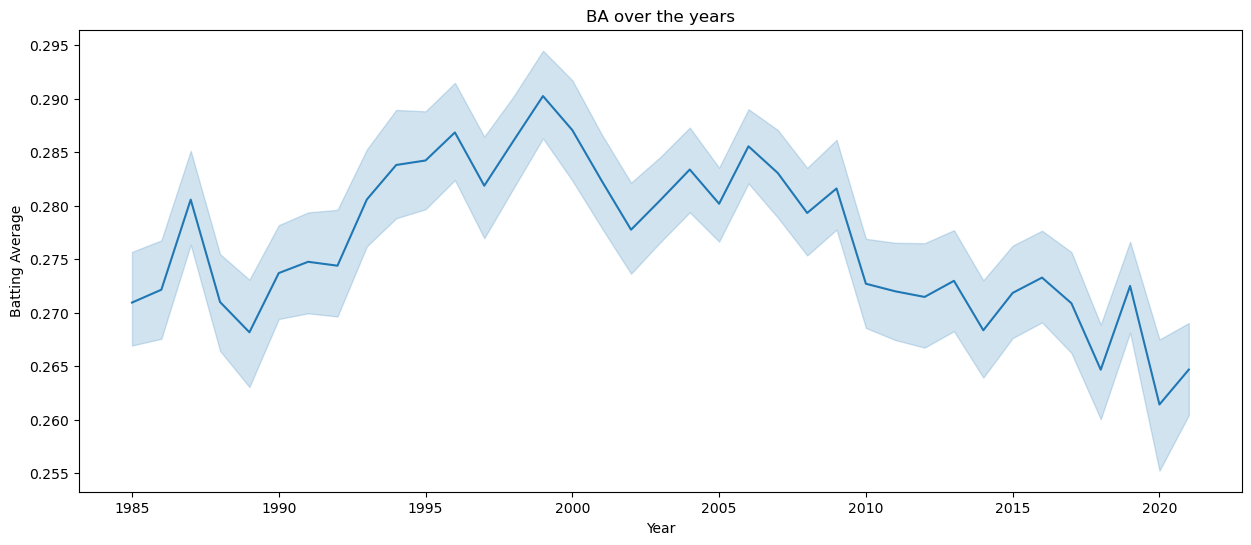

In [28]:
# BA over the years
plt.figure(figsize=(15, 6))
sns.lineplot(x='Year', y='BA', data=df[df['qualified'] == 1])
plt.title('BA over the years')
plt.xlabel('Year')
plt.ylabel('Batting Average')
plt.show()

#### OPS (On-base Plus Slugging)

OPS is a statistic that combines a player's on-base percentage (which measures their ability to reach base) and slugging percentage (which measures their power hitting). It is widely regarded as one of the most accurate indicators of a player's offensive performance.

Focusing on qualified batters allows us to consider players who have a sufficient number of plate appearances to be included in official batting statistics. This can help to ensure a more accurate reflection of player performance.

In [29]:
# Summary statistics of OPS for qualified batters
df[df['qualified'] == 1]['OPS'].describe()

count    5305.000000
mean        0.797723
std         0.100202
min         0.518000
25%         0.727000
50%         0.788000
75%         0.858000
max         1.421000
Name: OPS, dtype: float64

C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_24396\362379405.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


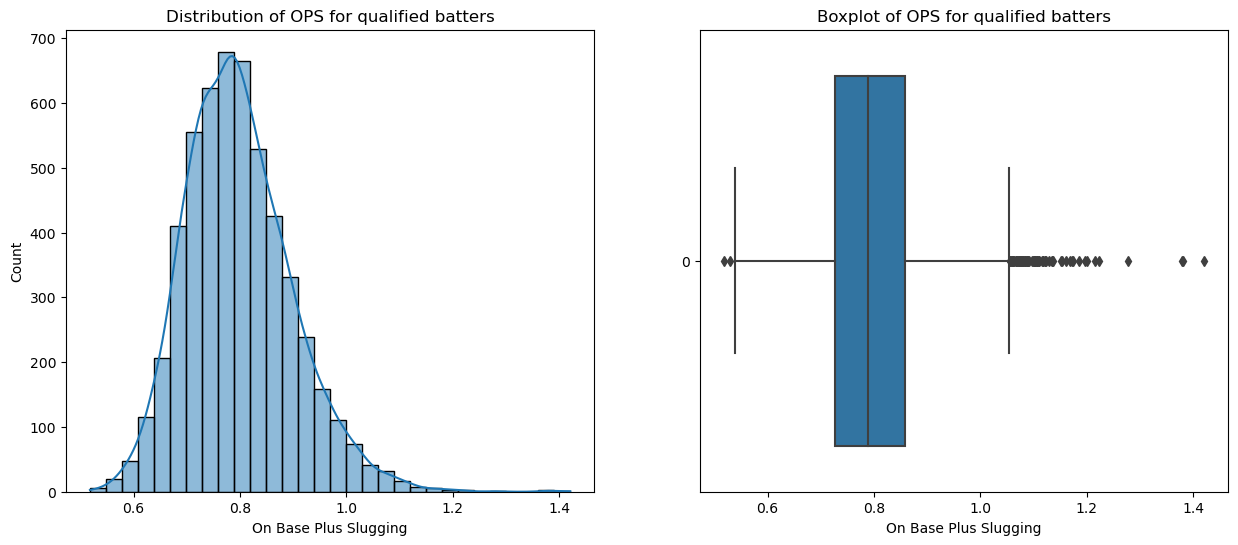

In [30]:
# Distribution of OPS for qualified batters
plt.subplots(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[df['qualified'] == 1]['OPS'], kde=True, bins=30)
plt.title('Distribution of OPS for qualified batters')
plt.xlabel('On Base Plus Slugging')
plt.ylabel('Count')

# Boxplot of OPS for qualified batters
plt.subplot(1, 2, 2)
sns.boxplot(df[df['qualified'] == 1]['OPS'].reset_index(drop=True), orient='h')
plt.title('Boxplot of OPS for qualified batters')
plt.xlabel('On Base Plus Slugging')

plt.show()

The provided summary statistics show that among qualified hitters, there are 5,305 observations of OPS. The average OPS is approximately 0.798, indicating that qualified batters tend to have good offensive performances.

The OPS values range from a minimum of 0.518 to a maximum of 1.421, highlighting the wide range of offensive performance among qualified hitters.

The shape of the distribution is somewhat symmetrical, and it appears to follow a roughly normal distribution. This suggests that most qualified batters have OPS values close to the mean, with fewer players having very high or very low OPS values. Both visualizations highlight the considerable variability in offensive performance among qualified batters as measured by OPS.

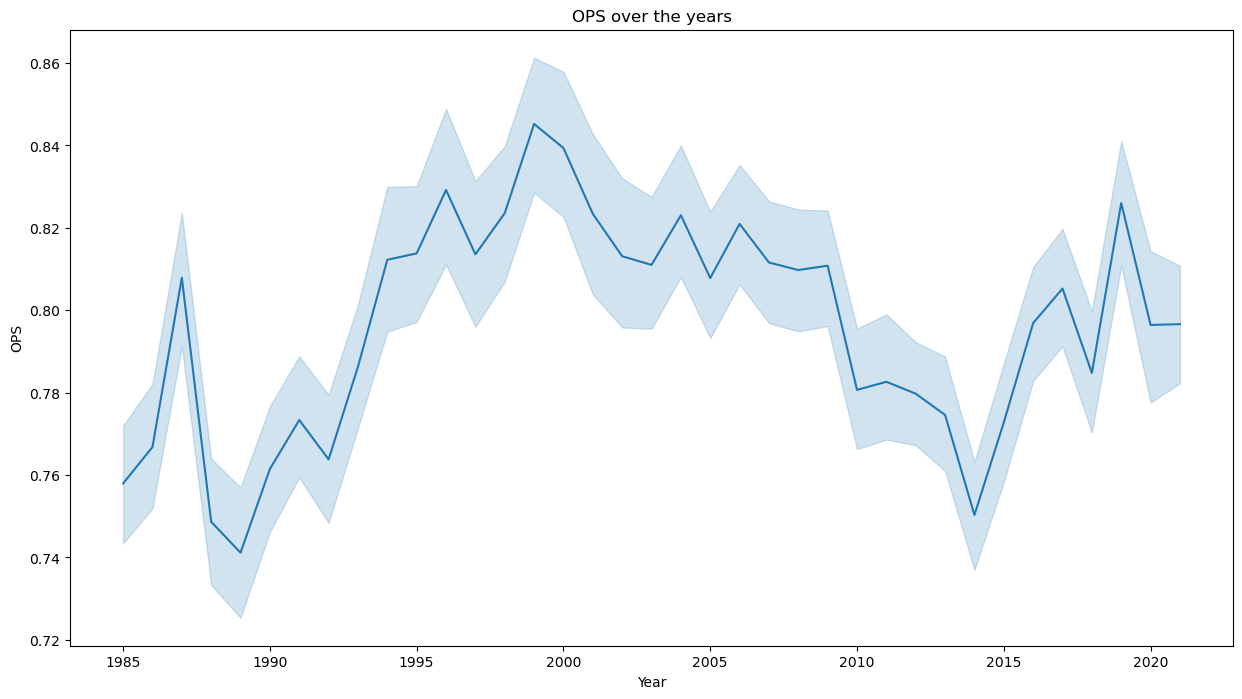

In [31]:
# OPS over the years
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y=df[df['qualified'] == 1]['OPS'], data=df)
plt.title('OPS over the years')
plt.xlabel('Year')
plt.ylabel('OPS')
plt.show()

##### WAR (Wins Above Replacement) distribution

In this section, we explore the distribution of the Wins Above Replacement (WAR) metric among the players. WAR is a comprehensive statistic that summarizes a player's total contributions to their team. It allows for comparisons between players of different positions and eras, and a higher WAR score generally indicates a more valuable player.

In [32]:
# Summary statistics of WAR
df['WAR'].describe()

count    22010.000000
mean         0.922065
std          1.759178
min         -3.710000
25%         -0.170000
50%          0.250000
75%          1.570000
max         11.850000
Name: WAR, dtype: float64

C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_24396\1163601596.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


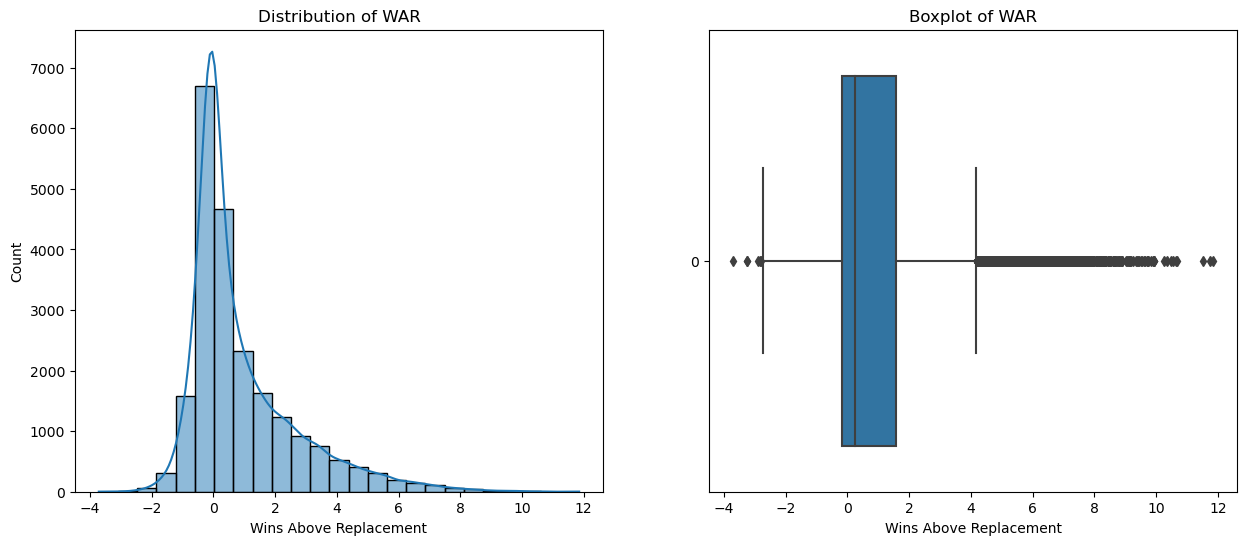

In [33]:
# Distribution of WAR
plt.subplots(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['WAR'], kde=True, bins=25)
plt.title('Distribution of WAR')
plt.xlabel('Wins Above Replacement')
plt.ylabel('Count')


# Boxplot of WAR
plt.subplot(1, 2, 2)
sns.boxplot(df['WAR'], orient='h')
plt.title('Boxplot of WAR')
plt.xlabel('Wins Above Replacement')

plt.show()

The mean WAR (0.93) is positive, indicating that on average, players contribute positively to their team compared to a replacement-level player. However, the wide range from -3.71 to 11.85 shows that there's significant variability in player performance. The standard deviation further confirms this high level of variability.

The shape of the distribution is right-skewed, meaning that there are a few players with very high WAR values that pull the mean WAR to the right of the median. This is consistent with our expectations, as the majority of players will have modest WAR values while a select few star players will have very high WAR values.

Both visualizations highlight the considerable variability in player performance as measured by WAR. This variability in WAR could be useful in predicting player salaries, as teams may be willing to pay more for players who consistently perform above replacement level. The negative minimum WAR suggests that some players perform worse than a replacement-level player, which could also be a factor in salary negotiations.

#### Plate Appearances (PA)

The PA (Plate Appearances) statistic represents the total number of times a player comes to bat. It's a fundamental measure of a player's involvement in the game. A higher number of plate appearances indicates that a player has more opportunities to contribute to the team's offense, which could be reflected in their salary. In other words, players who get to bat more often might be expected to have higher salaries.

In [34]:
# Summary statistics of PA
df['PA'].describe()

count    22010.000000
mean       280.636892
std        223.989844
min          0.000000
25%         71.000000
50%        233.000000
75%        478.000000
max        778.000000
Name: PA, dtype: float64

C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_24396\4230901963.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


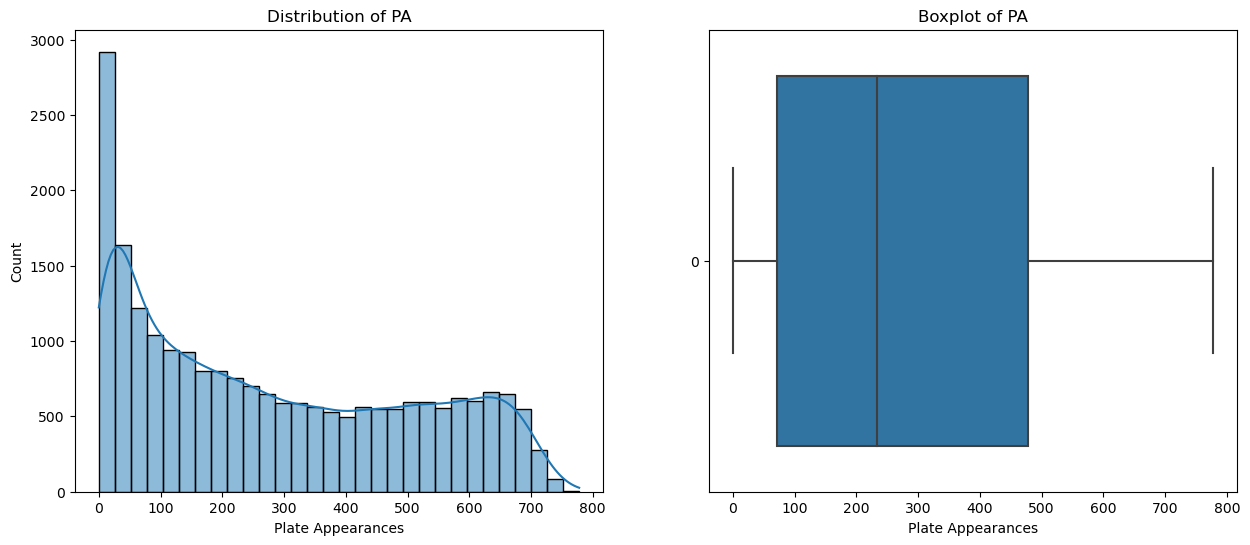

In [35]:
# Plot distribution of PA
plt.subplots(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['PA'], kde=True, bins=30)
plt.title('Distribution of PA')
plt.xlabel('Plate Appearances')
plt.ylabel('Count')


# Boxplot of PA
plt.subplot(1, 2, 2)
sns.boxplot(df['PA'], orient='h')
plt.title('Boxplot of PA')
plt.xlabel('Plate Appearances')

plt.show()


The average number of plate appearances for the players is approximately 280. The minimum number of plate appearances is 0, indicating that some players may not have had any plate appearances in a particular season.

From the histogram, we can see that the distribution of PA is skewed to the right, indicating that most players have fewer plate appearances, with a smaller number of players having a higher number of plate appearances.



#### Games Played (G)

The Games Played (G) metric represents the total number of games in which a player has participated in a given season. It provides a measure of a player's involvement and durability throughout the season. Regular starters and key players often have higher G values, reflecting their substantial contribution to the team's performance. In this section, we examine the distribution of G to understand the typical range and common values for this important metric.

In [36]:
# Summary statistics of G
df['GamesPlayer'].describe()

count    22010.000000
mean        79.062699
std         51.589591
min          1.000000
25%         29.000000
50%         80.000000
75%        127.000000
max        163.000000
Name: GamesPlayer, dtype: float64

C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_24396\2613058814.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


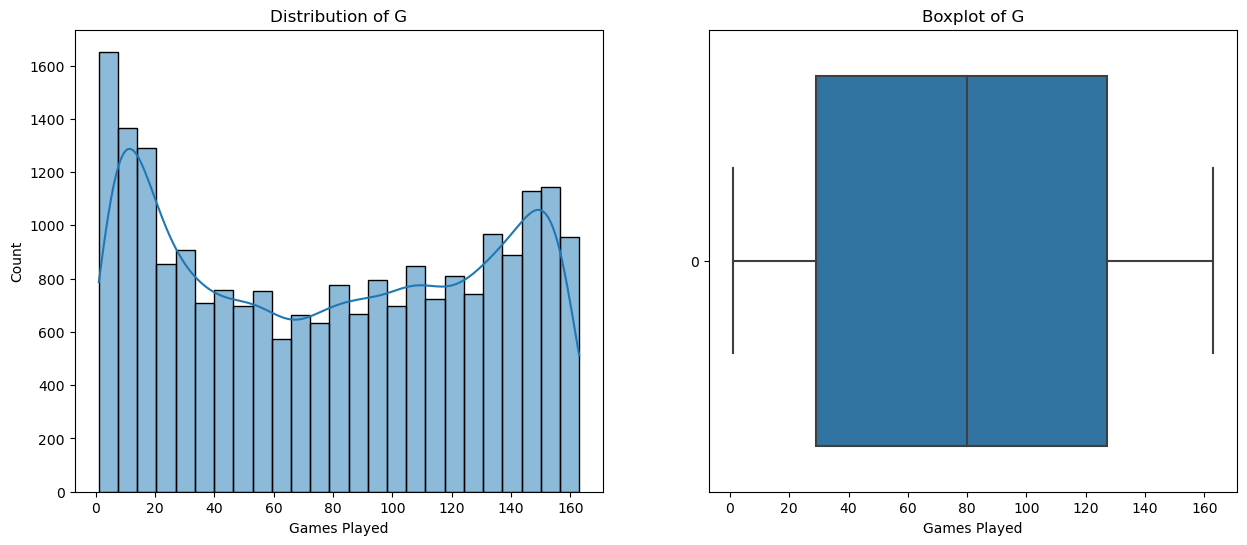

In [37]:
# Plot distribution of G
plt.subplots(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['GamesPlayer'], kde=True, bins=25)
plt.title('Distribution of G')
plt.xlabel('Games Played')
plt.ylabel('Count')

# Boxplot of G
plt.subplot(1, 2, 2)
sns.boxplot(df['GamesPlayer'], orient='h')
plt.title('Boxplot of G')
plt.xlabel('Games Played')

plt.show()

On average, the players have participated in approximately 79 games. The minimum number of games played is 1, indicating that some players may have only appeared in a single game in a season. The maximum number of games played recorded in the dataset is 163, indicating that some players have played in every game in a season.

From the histogram, we can see that the distribution of games played is somewhat bimodal, with peaks around 1 -20 games and 130-140 games. This suggests that there are two common types of players in the dataset: those who play relatively few games (possibly due to injuries, being new to the league, or playing a backup role), and those who play most of the games in a season (likely regular starters).

## 6.  Relationship Between Salary and Demographics <a id='salary-demographics'></a>

Now that we have an understanding of the salaries and key demographic characteristics of MLB players, let's investigate if there is a relationship between these factors.

It's possible that certain demographic factors could influence a player's salary. For example, players with more years of experience could command higher salaries due to their proven track record of performance. Similarly, factors such as player position, handedness, or even the team they play for could potentially impact their earning potential.

In this section, we will explore these relationships by examining the correlation between salary and various demographic factors. This will provide further insight into the salary structure in MLB and may reveal interesting patterns or trends.


#### Salary and Age

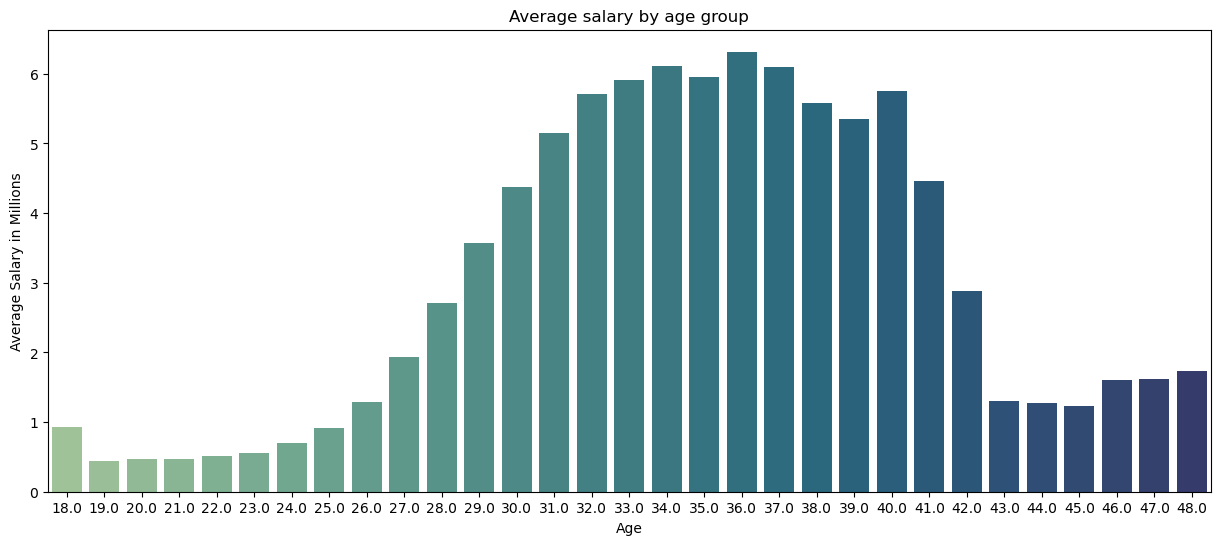

In [38]:
# Average salary by age group
salary_by_age = df.groupby('age')['adjusted_salary'].mean()

# Plot of average salary by age group
plt.figure(figsize=(15, 6))
sns.barplot(x=salary_by_age.index, y=salary_by_age.values/1_000_000, palette='crest')
plt.title('Average salary by age group')
plt.xlabel('Age')
plt.ylabel('Average Salary in Millions')
plt.show()

The average salary by age group displays a curve that increases as players age, peaking around the mid-30s (specifically around 34-36 years old), and then begins to decrease. This pattern could be attributed to players typically entering the MLB in their early 20s, gradually improving and thus earning higher salaries. By their mid-30s, players often reach the peak of their careers, commanding the highest salaries. However, as players age past this point, their performance might decline due to factors such as physical health and stamina, leading to a decrease in average salary.

It's also worth noting that the salaries for players aged 46-48 are slightly higher than those for players aged 43-45. This could be due to a small sample size of players who continue to play professionally at these older ages, potentially skewing the average salary.

#### Salary and Position

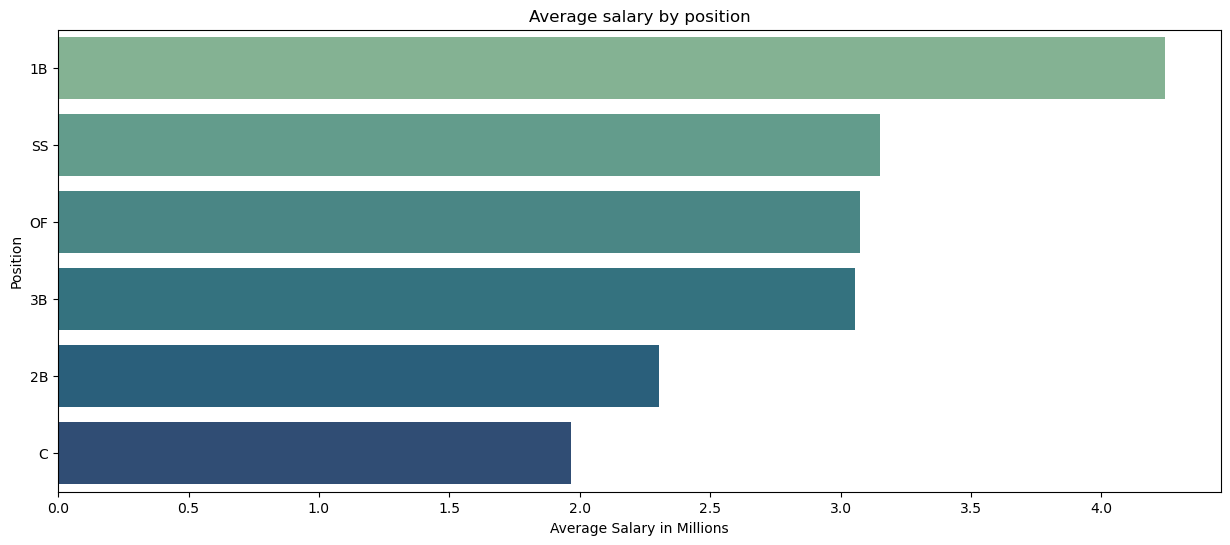

In [39]:
# Average salary by position
avg_sal_pos = df.groupby('POS')['adjusted_salary'].mean().sort_values(ascending=False).head(6)

# Plot of average salary by position
plt.figure(figsize=(15, 6))
sns.barplot(y=avg_sal_pos.index, x=avg_sal_pos.values/1_000_000, orient='h', palette='crest')
plt.title('Average salary by position')
plt.xlabel('Average Salary in Millions')
plt.ylabel('Position')
plt.show()

In [40]:
avg_sal_pos

POS
1B    4.244733e+06
SS    3.152805e+06
OF    3.074059e+06
3B    3.056672e+06
2B    2.302539e+06
C     1.966361e+06
Name: adjusted_salary, dtype: float64

The average salary by position reveals that first basemen (1B) are, on average, the highest paid players in the league, followed by shortstops (SS), outfielders (OF), and third basemen (3B). Second basemen (2B) and catchers (C) are found to have lower average salaries compared to the other positions.

This could be attributed to the specific skills and responsibilities associated with each position. For instance, first basemen are often key hitters in the lineup, contributing significantly to the team's offensive performance. Shortstops, on the other hand, are typically highly skilled defenders with strong throwing and fielding abilities. These positions are often seen as more 'valuable' and hence command higher salaries.

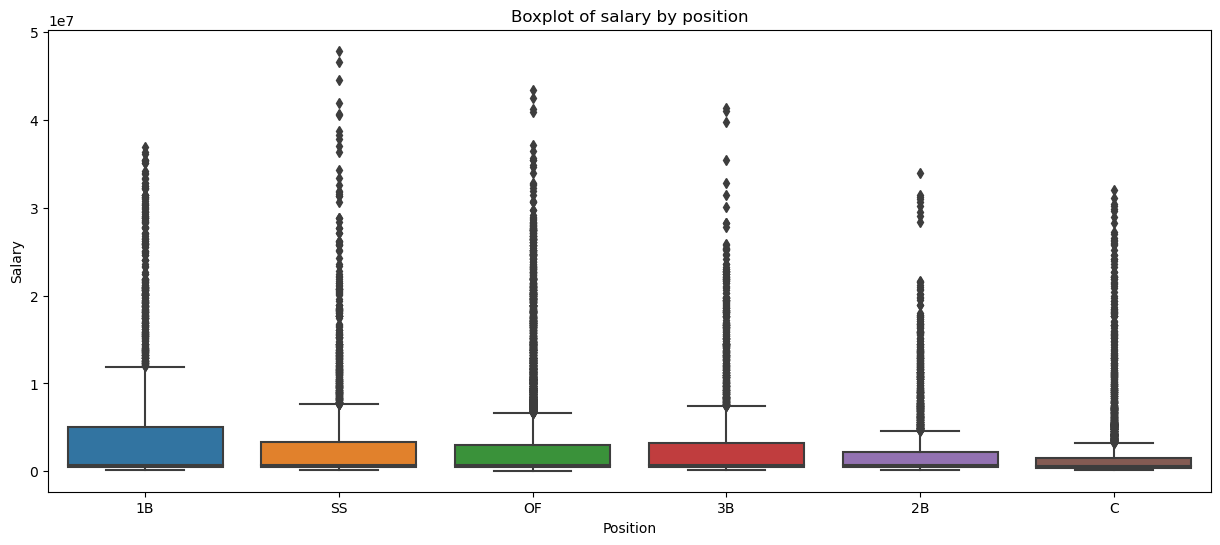

In [41]:
# Boxplot of salary by position
plt.figure(figsize=(15, 6))
sns.boxplot(x='POS', y='adjusted_salary', data=df, order=avg_sal_pos.index)
plt.title('Boxplot of salary by position')
plt.xlabel('Position')
plt.ylabel('Salary') 

#save figure
plt.savefig('boxplot_salary_by_position.png')

plt.show()


We can observe that the median salary varies by position, as shown by the line inside each box. The variation in salaries within each position is also evident, as indicated by the size of the boxes and the length of the whiskers.

The position '1B' (First Baseman) appears to have the highest median salary, followed by 'SS' (Short Stop), and 'OF' (Outfielder). These positions also seem to have a greater range of salaries, as indicated by the larger interquartile range (the height of the box). On the other hand, positions such as '2B' (Second Baseman), and 'C' (Catcher) have lower median salaries and smaller ranges.

This boxplot suggests that the position a player plays on the field could be an influential factor in determining their salary. This could be due to different skill requirements, injury risks, or supply and demand dynamics for players in each position.

## 7. Relationship Between Salary and Performance Metrics <a id='salary-performance-metrics'></a>
In this section, we will investigate the relationship between player performance metrics and their salaries. The key question we aim to answer is, "Do better performing players earn significantly more?"

Player performance in baseball is quantified using a range of statistics. For batters, these can include batting average (`BA`), on-base plus slugging (`OPS`), home runs (`HR`), runs batted in (`RBI`), and more. For the purpose of our analysis, we will focus on some of the most common and indicative metrics of a player's performance.

The goal is to identify any patterns or trends that could indicate a strong correlation between performance and salary. These insights could prove crucial in building our predictive model and understanding the monetary value of a player's performance in Major League Baseball.

#### Batting Average (BA) and Salary

##### Batting Average and Salary per season

C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_24396\1510187080.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


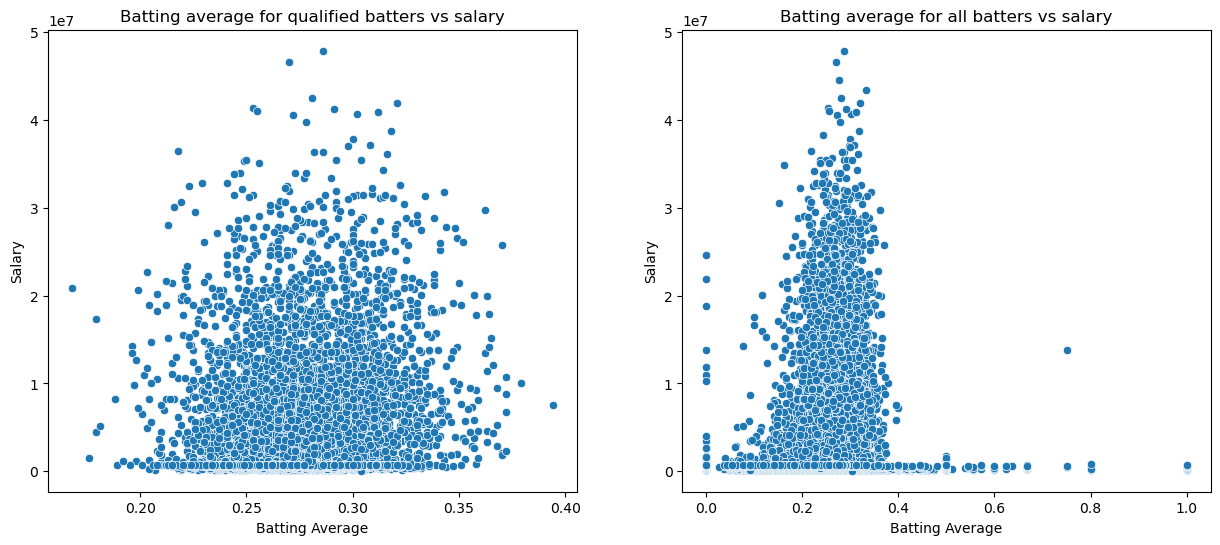

In [42]:
# subplots for batting average for qualified batters vs salary, and all batters vs salary
plt.subplots(figsize=(15, 6))

# Plot of batting average for qualified batters vs salary
plt.subplot(1, 2, 1)
sns.scatterplot(x='BA', y='adjusted_salary', data=df[df['qualified'] == 1])
plt.title('Batting average for qualified batters vs salary')
plt.xlabel('Batting Average')
plt.ylabel('Salary')

# Plot of batting average for all batters vs salary
plt.subplot(1, 2, 2)
sns.scatterplot(x='BA', y='adjusted_salary', data=df)
plt.title('Batting average for all batters vs salary')
plt.xlabel('Batting Average')
plt.ylabel('Salary')

plt.show()



The left plot, which considers only qualified batters, offers a more 'standard' perspective. It focuses on players who have had a significant number of plate appearances (PAs) in a season, and who therefore have batting averages that are more reliable indicators of their skill. This plot shows a general trend where higher batting averages correlate with higher salaries but, the relation doesn't seem to be linear. 

On the other hand, the right plot, which includes all players regardless of the number of their PAs, presents a more comprehensive but also more complex picture. This plot includes players with very high batting average (> .400). This result can be explained by the fact that these players' high averages are likely due to the small number of opportunities they've had at the plate.

Including both plots in our analysis is important for a few reasons. Firstly, it acknowledges the fact that all players get paid, regardless of the number of PAs they have in a season. Secondly, it highlights the variability in player salaries and performances, even among players with similar batting averages. Finally, it underscores the fact that while performance is an important factor in determining salary, it's far from the only one.

##### Career Batting Average

C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_24396\2096049589.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


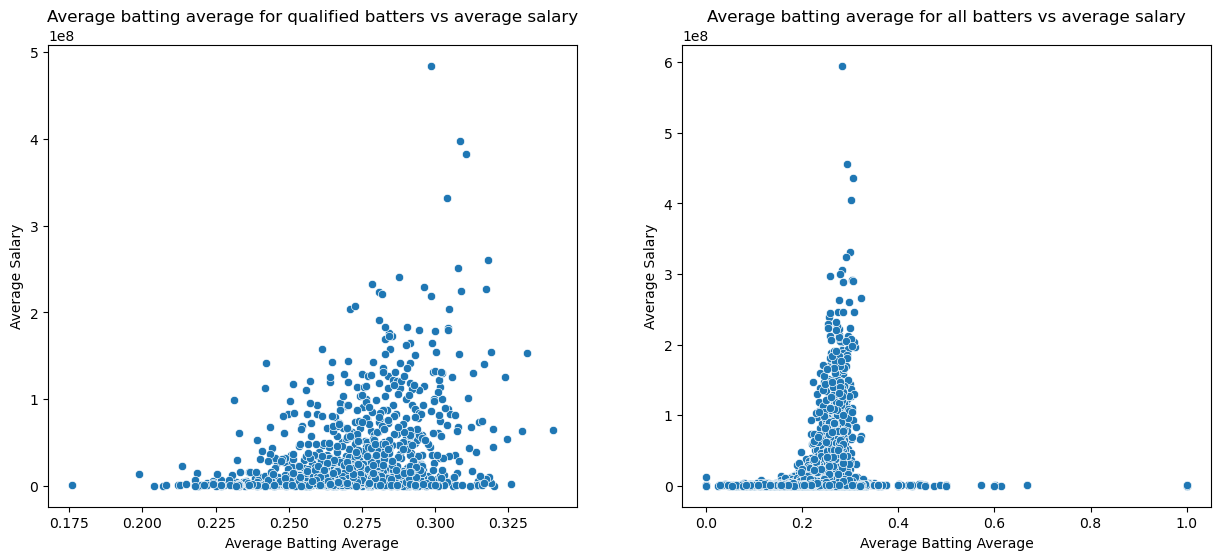

In [43]:
# Subplots for average batting average for qualified batters vs average salary, and all batters vs average salary
avg_ba_q = df[df['qualified'] == 1].groupby('playerID').agg({'BA': 'mean', 'adjusted_salary': 'sum'})
avg_ba_all = df.groupby('playerID').agg({'BA': 'mean', 'adjusted_salary': 'sum'})

plt.subplots(figsize=(15, 6))

# Plot of average batting average for qualified batters vs average salary
plt.subplot(1, 2, 1)
sns.scatterplot(x='BA', y='adjusted_salary', data=avg_ba_q)
plt.title('Average batting average for qualified batters vs average salary')
plt.xlabel('Average Batting Average')
plt.ylabel('Average Salary')

# Plot of average batting average for all batters vs average salary
plt.subplot(1, 2, 2)
sns.scatterplot(x='BA', y='adjusted_salary', data=avg_ba_all)
plt.title('Average batting average for all batters vs average salary')
plt.xlabel('Average Batting Average')
plt.ylabel('Average Salary')

plt.show()


These scatter plots provide a summary view of the overall relationship between batting average and salary over a player's career. While the goal of the project is to predict salaries for individual seasons, understanding the long-term relationship between performance and salary can provide valuable context. For instance, if a player consistently performs well over several seasons, their salary is likely to reflect this sustained success.

The left plot displays this relationship only for qualified batters. We can see a positive correlation here, meaning that as the average batting average increases, so does the average salary. The data points are more concentrated, and it appears that the higher batting averages correspond to higher salaries.

The right plot displays this relationship for all batters, qualified or not. We can see that there's a wider spread of data points, especially for lower batting averages. This plot also shows a positive correlation between average batting average and average salary, but the correlation seems weaker than that of the qualified batters. This suggests that while batting performance does impact salary, other factors may also be at play, especially for those who are not qualified batters.

#### On Base Plus Slugging (OPS) and Salary

##### OPS and Salary per season

C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_24396\1963317384.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


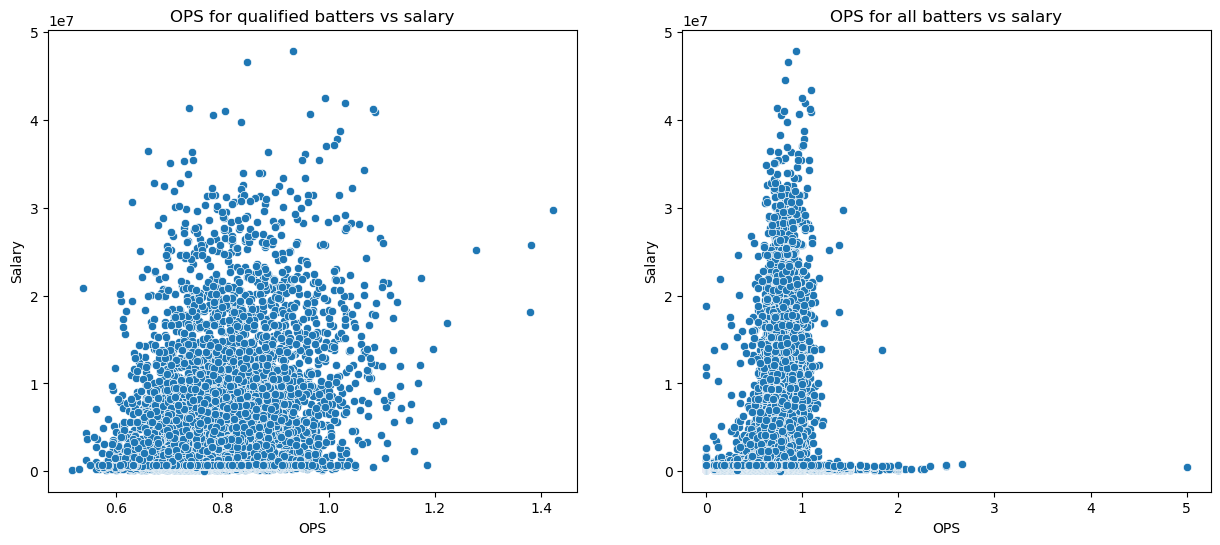

In [44]:
# Subplots for OPS for qualified batters vs salary, and all batters vs salary
plt.subplots(figsize=(15, 6))

# Plot of OPS for qualified batters vs salary
plt.subplot(1, 2, 1)
sns.scatterplot(x='OPS', y='adjusted_salary', data=df[df['qualified'] == 1])
plt.title('OPS for qualified batters vs salary')
plt.xlabel('OPS')
plt.ylabel('Salary')

# Plot of OPS for all batters vs salary
plt.subplot(1, 2, 2)
sns.scatterplot(x='OPS', y='adjusted_salary', data=df)
plt.title('OPS for all batters vs salary')
plt.xlabel('OPS')
plt.ylabel('Salary')

plt.show()

For the scatter plot of qualified batters (left), we observe a positive correlation between a player's OPS and their salary. As the OPS increases, the player's salary also tends to increase. This is expected as OPS is a widely used metric to measure a player's offensive skills in baseball, and players with high offensive skills are often more valued.

For the scatter plot of all batters (right), we also observe a similar positive correlation. However, we can see more variance especially at the lower end of OPS. This is likely due to the inclusion of players with low Plate Appearances (PA), who might have extreme OPS values (either very low or very high) due to the small number of appearances, but still receive a salary.

C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_24396\3623997232.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


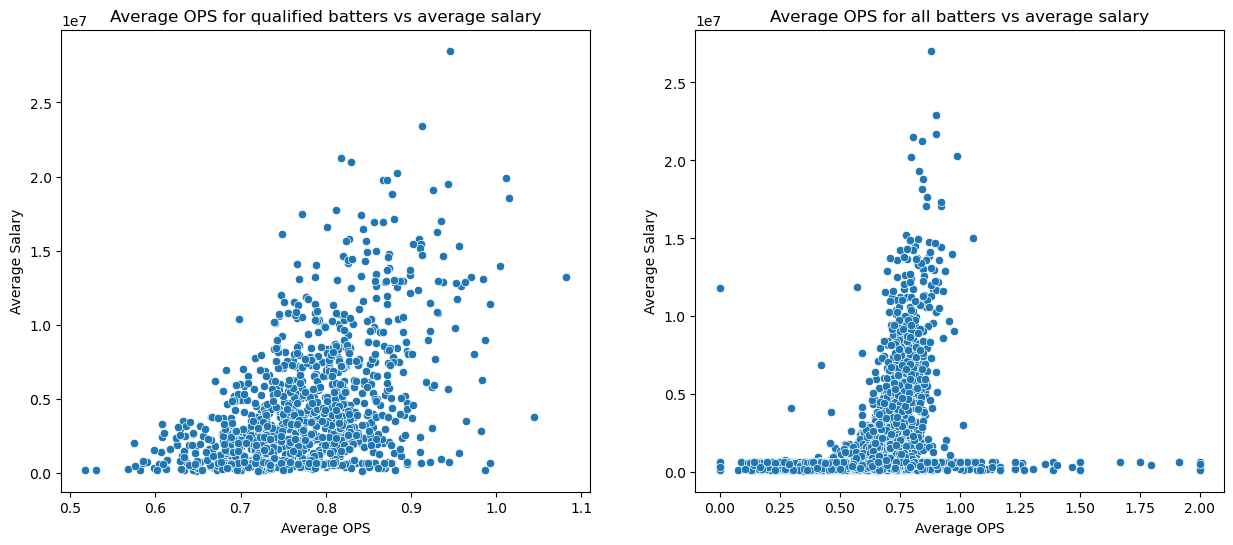

In [45]:
# Subplots for average OPS for qualified batters vs average salary, and all batters vs average salary
avg_ops_q = df[df['qualified'] == 1].groupby('playerID').agg({'OPS': 'mean', 'adjusted_salary': 'mean'})

avg_ops_all = df.groupby('playerID').agg({'OPS': 'mean', 'adjusted_salary': 'mean'})

plt.subplots(figsize=(15, 6))

# Plot of average OPS for qualified batters vs average salary
plt.subplot(1, 2, 1)
sns.scatterplot(x='OPS', y='adjusted_salary', data=avg_ops_q)
plt.title('Average OPS for qualified batters vs average salary')
plt.xlabel('Average OPS')
plt.ylabel('Average Salary')

# Plot of average OPS for all batters vs average salary
plt.subplot(1, 2, 2)
sns.scatterplot(x='OPS', y='adjusted_salary', data=avg_ops_all)
plt.title('Average OPS for all batters vs average salary')
plt.xlabel('Average OPS')
plt.ylabel('Average Salary')

plt.show()

In the first plot (qualified batters), we observe a clear upward trend, indicating a positive correlation between OPS and salary. 

The second plot (all batters) also shows a similar trend, but with more variance and a wider range of OPS values. This is expected as it includes all players, regardless of their number of plate appearances.

This perspective looks at the average OPS and salary across all seasons for a player. This view smooths out the year-to-year fluctuations and provides a more stable measure of a player's overall performance and the associated compensation. By looking at the average, we can identify general trends and relationships in the data without getting distracted by short-term variations.

However, it's important to note that the average view can be sensitive to outliers, especially for players with shorter careers where a single high-performing or low-performing season can significantly impact the average.

#### Home Runs (HR) and Salary

##### Home Runs and Salary per season and Average Home Runs vs Average Salary

C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_24396\2460563408.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


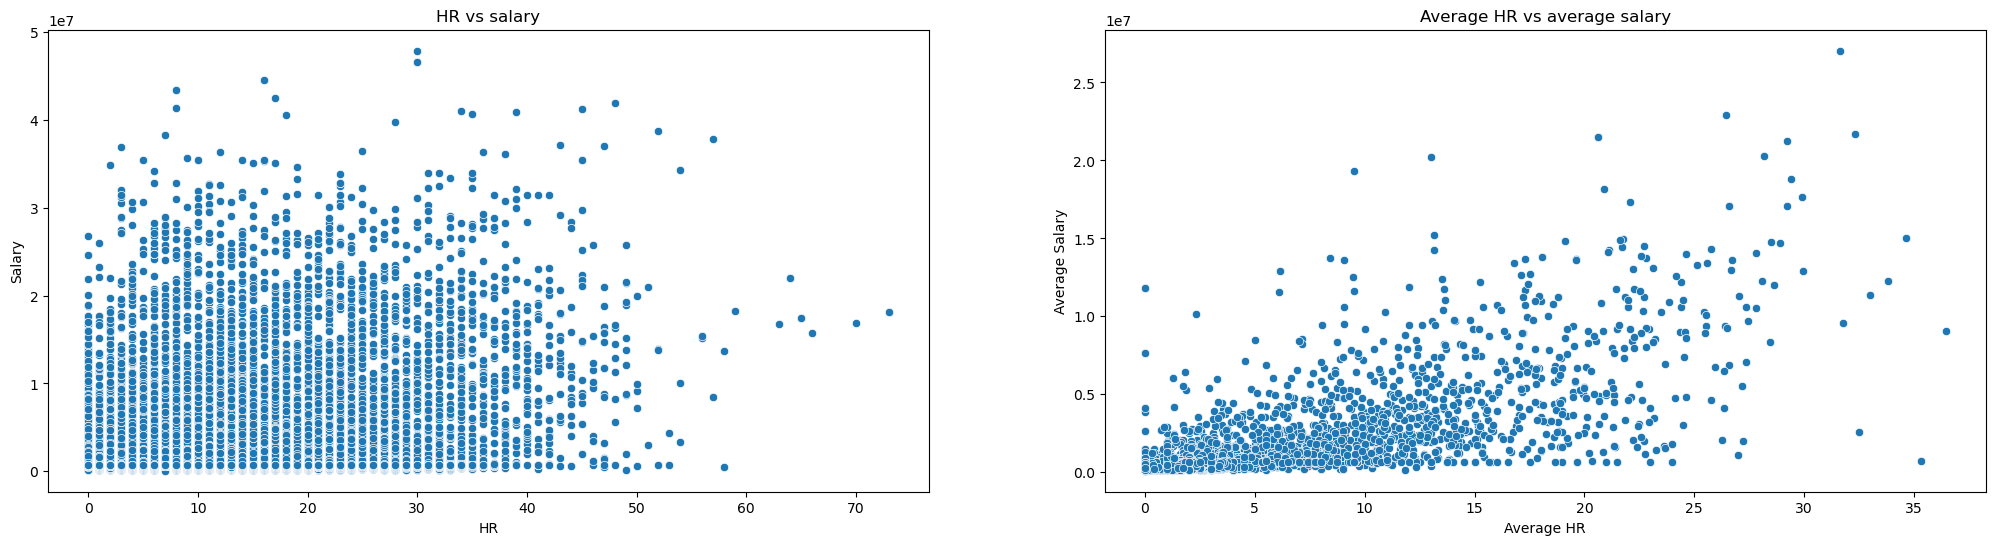

In [46]:
# Average HR vs average salary
avg_hr = df.groupby('playerID').agg({'HR_p': 'mean', 'adjusted_salary': 'mean'})

plt.subplots(figsize=(25, 6))

# Plot HR vs salary
plt.subplot(1, 2, 1)
sns.scatterplot(x='HR_p', y='adjusted_salary', data=df)
plt.title('HR vs salary')
plt.xlabel('HR')
plt.ylabel('Salary')


plt.subplot(1, 2, 2)
sns.scatterplot(x='HR_p', y='adjusted_salary', data=avg_hr)
plt.title('Average HR vs average salary')
plt.xlabel('Average HR')
plt.ylabel('Average Salary')

plt.show()

The plot on the left shows a general trend where players who hit more home runs in a season tend to earn a higher salary. This is expected as home runs are a significant aspect of a player's offensive performance. Players who are good at hitting home runs are typically more valuable to teams and hence, get paid more.

However, it's worth noting that, as in many other metrics, there are many points spread out and not strictly following the trend. This indicates that there are other factors at play in determining a player's salary beyond just the number of home runs they hit. Also, some players with very high home runs in a season don't necessarily have the highest salaries, and vice versa. This further supports the notion that a player's salary is influenced by multiple factors.

On the right, the plot smoothens out the within-career volatility and gives a clearer picture of the overall relationship between home run performance and salary across different players.

From this scatter plot, it does appear that the relationship between average home runs and average salary is more positive than the relationship between home runs per season and salary. This might suggest that while there is considerable variation in home run performance and salary from season to season, players who consistently hit a high number of home runs throughout their career tend to earn higher salaries on average.

#### Runs Batted In (RBI) and Salary


##### Runs Batted In and Salary per season

C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_24396\2627925602.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


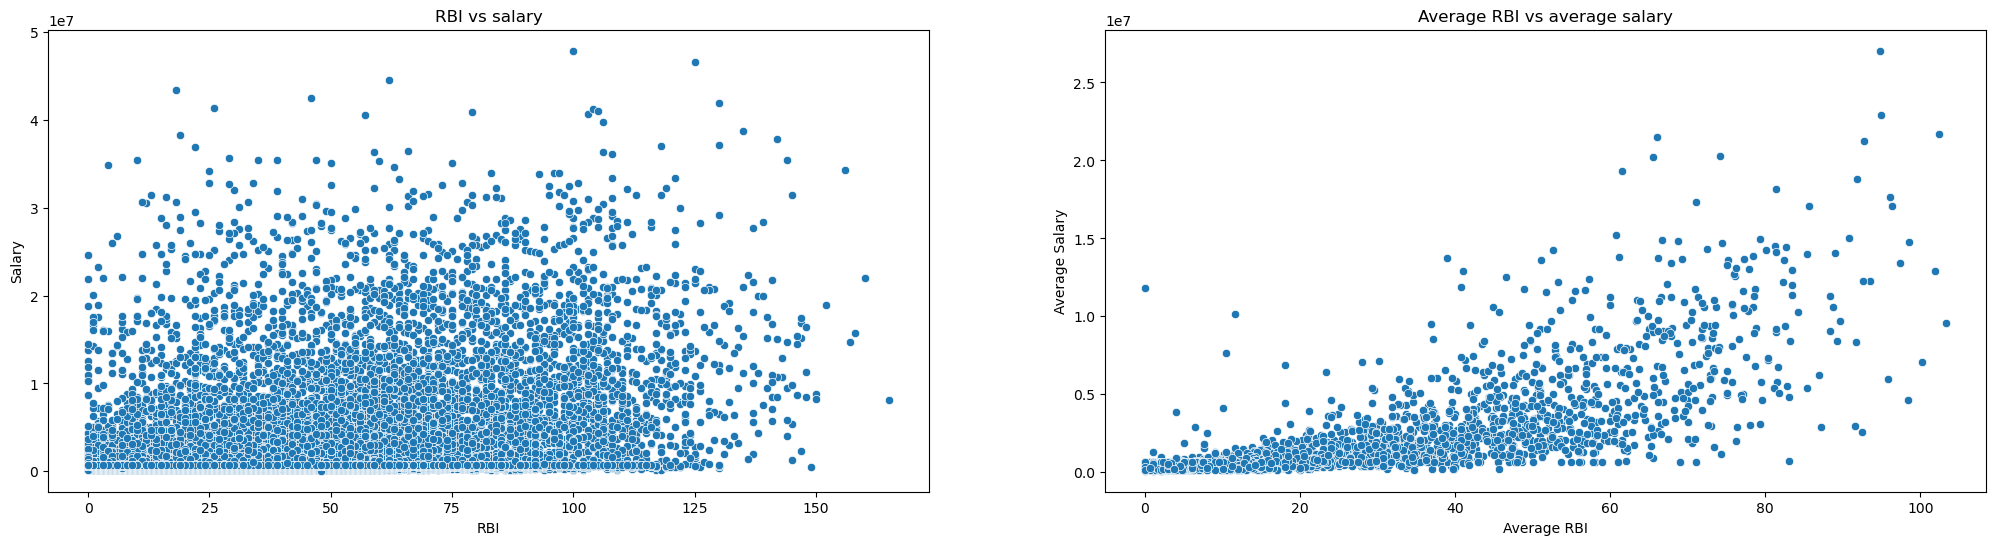

In [47]:
# Subplots of RBI vs salary and average RBI vs average salary
# Average RBI vs average salary
avg_rbi = df.groupby('playerID').agg({'RBI': 'mean', 'adjusted_salary': 'mean'})

plt.subplots(figsize=(25, 6))

# Plot of RBI vs salary
plt.subplot(1, 2, 1)
sns.scatterplot(x='RBI', y='adjusted_salary', data=df)
plt.title('RBI vs salary')
plt.xlabel('RBI')
plt.ylabel('Salary')

# Plot of average RBI vs average salary
plt.subplot(1, 2, 2)
sns.scatterplot(x='RBI', y='adjusted_salary', data=avg_rbi)
plt.title('Average RBI vs average salary')
plt.xlabel('Average RBI')
plt.ylabel('Average Salary')

plt.show()


The scatter plot on the left shows the relationship between RBIs and salary for each individual season for qualified players. We can see a general upward trend, indicating that players who score more runs in a season tend to have higher salaries. However, the relationship is not perfectly linear, and there is a lot of spread in the data, especially at lower RBIs.

The scatter plot on the right shows the relationship between the average number of RBIs and the average salary over a player's career. Similar to the previous plot, we see an upward trend, indicating that players with higher career RBIs tend to have higher average salaries. This relationship appears somewhat stronger than in the season-by-season plot, suggesting that consistent performance over a player's career is an important factor in their salary.



#### Consistency and Salary: Plate Appearances vs. Salary

Plate appearances are a direct indicator of a player's participation in games, and consistent players are often seen as more valuable due to their reliability and potential to impact games more frequently. We will explore whether this perceived value is reflected in their salaries. Similar to the previous metrics, we will investigate this relationship for both individual seasons and averaged over players' careers.

C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_24396\1500222228.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


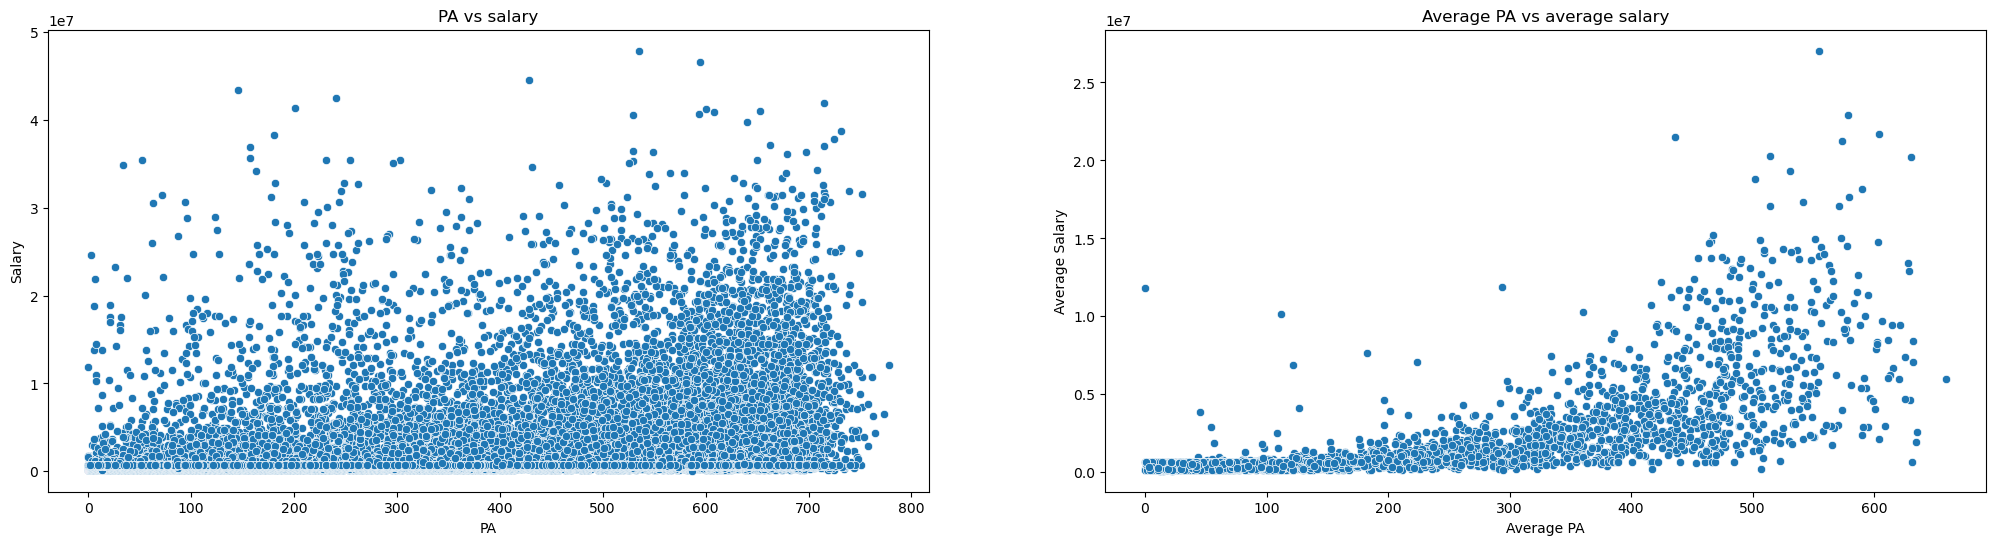

In [48]:
avg_PA = df.groupby('playerID').agg({'PA': 'mean', 'adjusted_salary': 'mean'})

# Subplots of PA vs salary and average PA vs average salary
plt.subplots(figsize=(25, 6))

# Plot of PA vs salary
plt.subplot(1, 2, 1)
sns.scatterplot(x='PA', y='adjusted_salary', data=df)
plt.title('PA vs salary')
plt.xlabel('PA')
plt.ylabel('Salary')

# Plot of average PA vs average salary
plt.subplot(1, 2, 2)
sns.scatterplot(x='PA', y='adjusted_salary', data=avg_PA)
plt.title('Average PA vs average salary')
plt.xlabel('Average PA')
plt.ylabel('Average Salary')

plt.show()

The scatter plots above showcase the relationship between plate appearances (PA) and player salaries.

In the left plot, we examine the relationship on a per season basis. Each point in the scatter plot represents a single season for a player. There appears to be a general upward trend, indicating that players with more plate appearances tend to have higher salaries.

In the right plot, we look at the average plate appearances and average salary for each player over their entire career. Similar to the per season analysis, we see an upward trend, indicating that players who, on average, have more plate appearances also tend to have higher salaries.

These plots suggest that the number of plate appearances, which can be seen as a proxy for a player's consistency and longevity, could be an important feature in our model for predicting player salaries.

#### Summary of relationships between variables

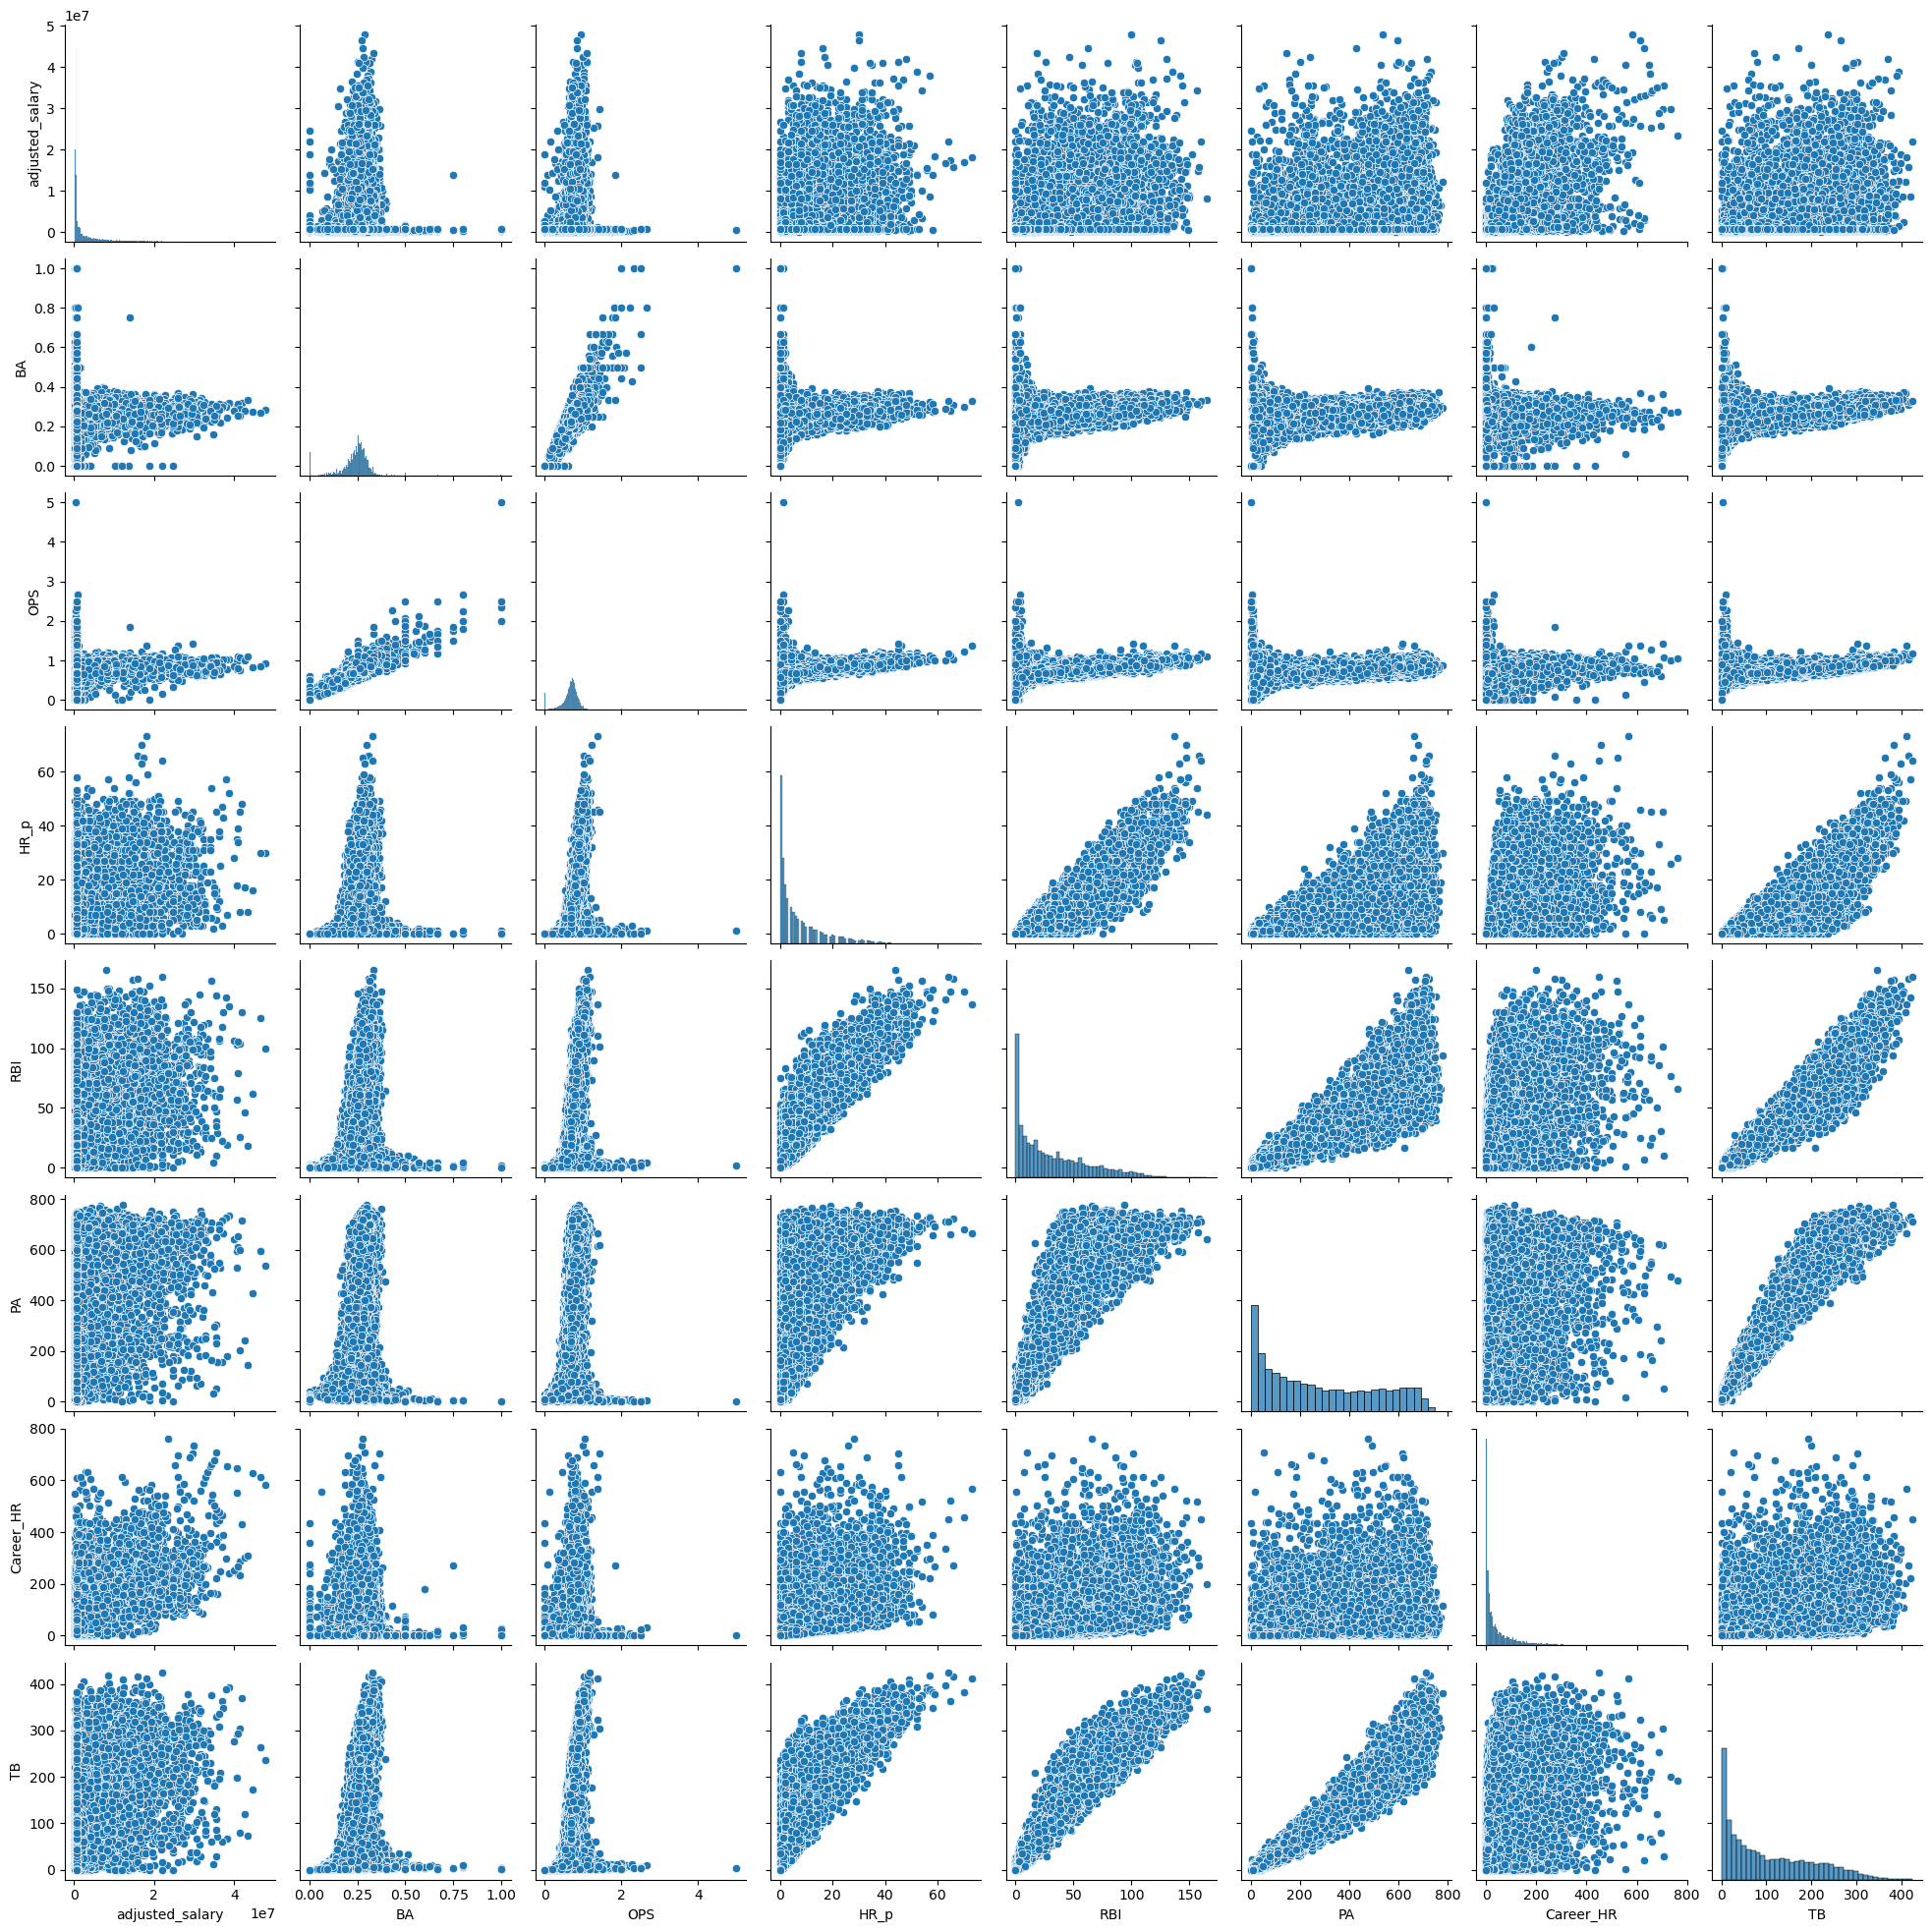

In [49]:
# Pairplot 
batting_pp = df[['adjusted_salary', 'BA', 'OPS', 'HR_p', 'RBI', 'PA', 'Career_HR', 'TB']]

sns.pairplot(batting_pp)
plt.show()


C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_24396\329866587.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


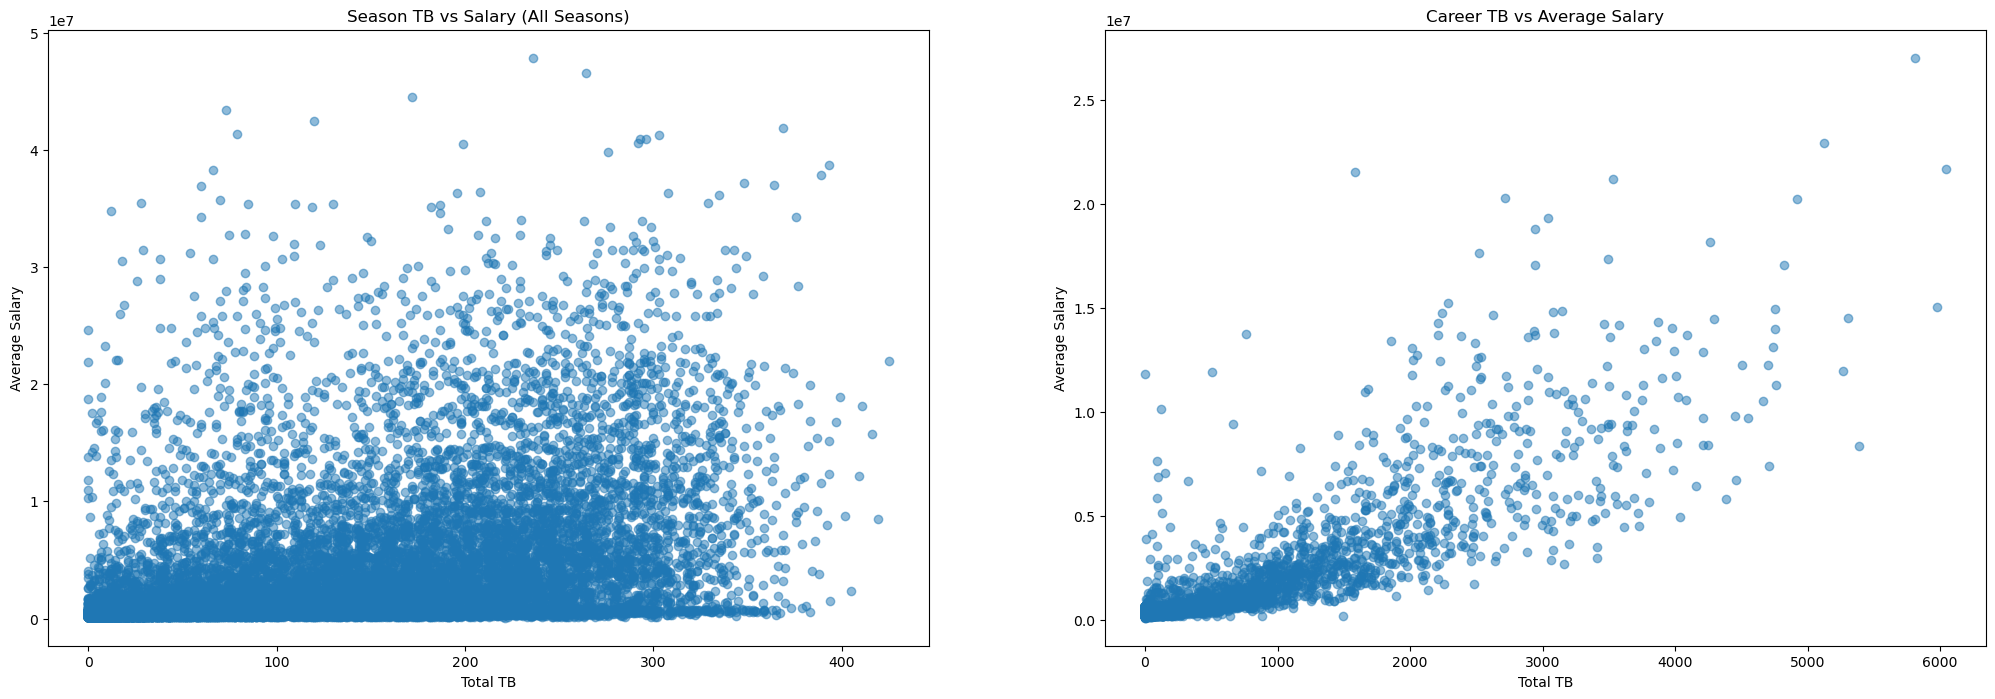

In [50]:
# TB vs Salary

# Total TB vs Average Salary
total_tb = df.groupby('playerID').agg({'TB': 'sum', 'adjusted_salary': 'mean'})

# Plot
plt.subplots(figsize=(25, 8))

plt.subplot(1, 2, 2)
plt.scatter(total_tb['TB'], total_tb['adjusted_salary'], alpha=0.5)
plt.title('Career TB vs Average Salary')
plt.xlabel('Total TB')
plt.ylabel('Average Salary')

plt.subplot(1, 2, 1)
plt.scatter(x='TB', y='adjusted_salary', alpha=0.5, data=df)
plt.title('Season TB vs Salary (All Seasons)')
plt.xlabel('Total TB')
plt.ylabel('Average Salary')

# Save figure
plt.savefig('tb_vs_salary.png')

plt.show()

## 8. Correlation Analysis
In this section, we will conduct a correlation analysis to measure the strength and direction of the linear relationships between the various features in our dataset

### 8.2 Correlation between Features and Salary
First, we will look at the correlation between the different metrics and the player's salary. This will help us understand which features are strongly associated with the player's salary, and hence, might be significant predictors in our model.

C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_24396\3034192835.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


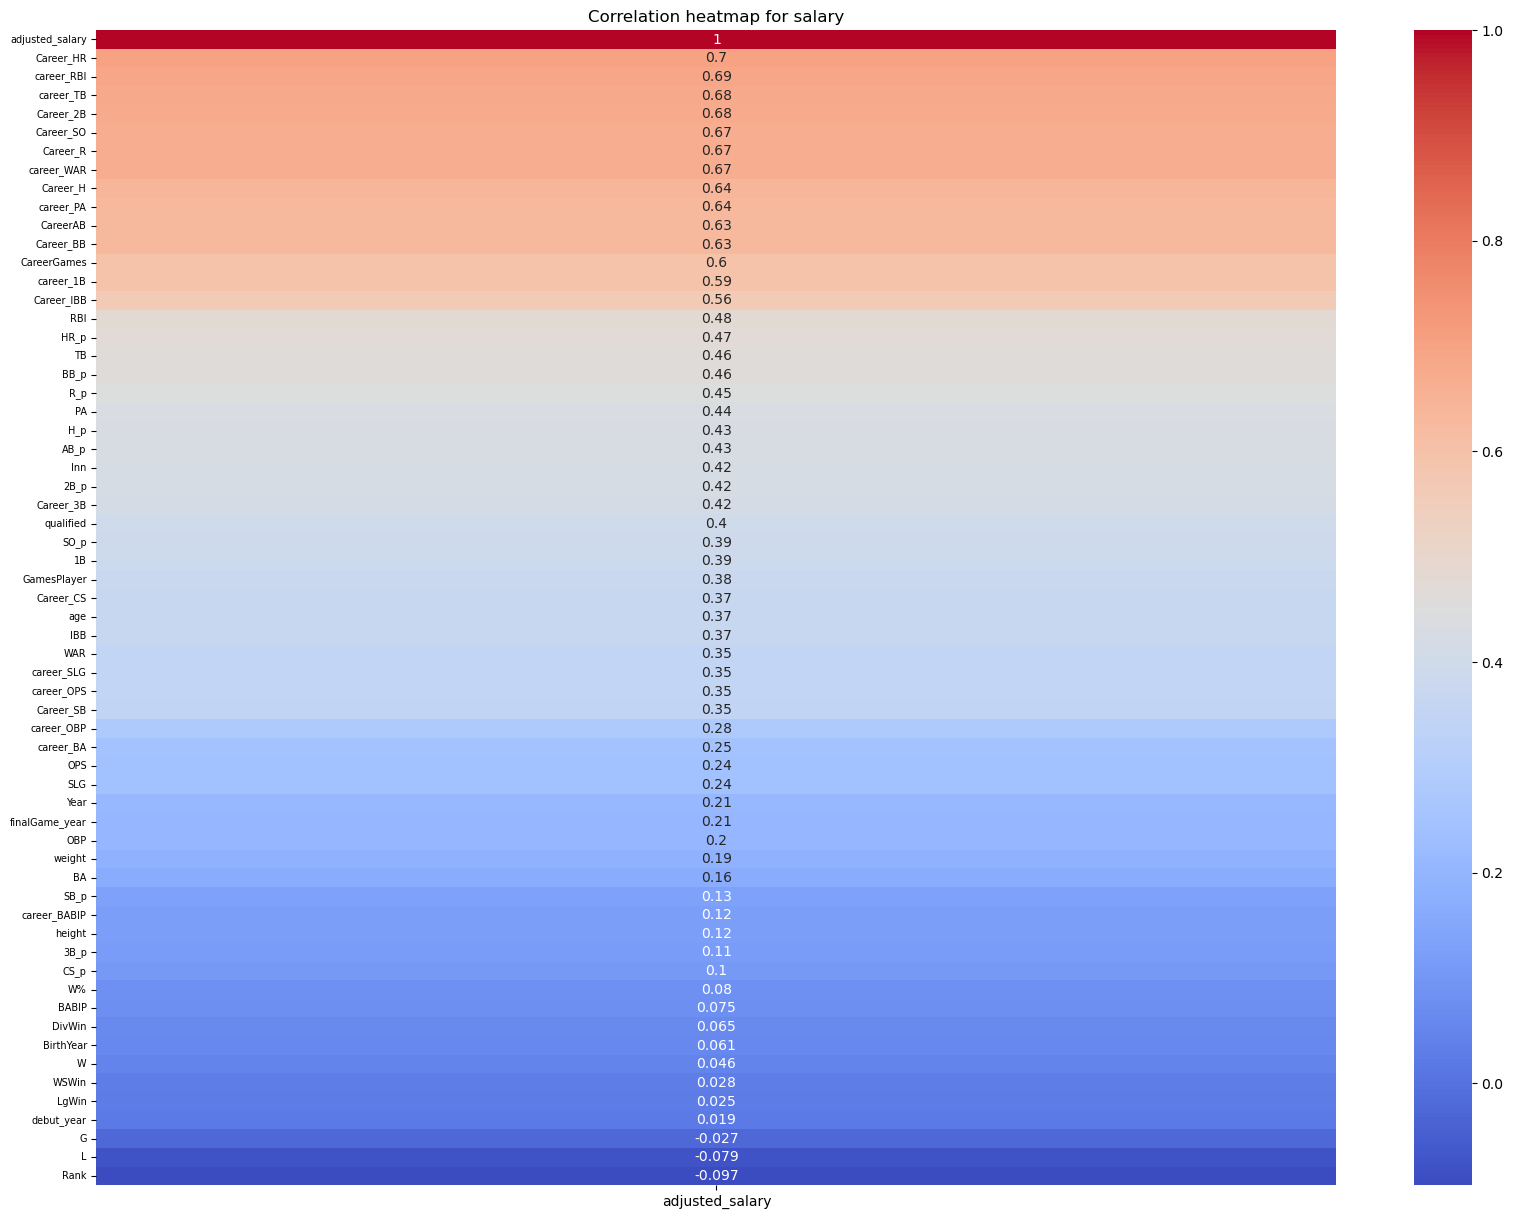

In [57]:
# All correlations for adjusted salary
corr = df.corr()
# heatmap of correlations
plt.figure(figsize=(20, 15))
sns.heatmap(corr[['adjusted_salary']].sort_values(by='adjusted_salary', ascending=False), annot=True, cmap='coolwarm')
plt.yticks(fontsize=7)
plt.title('Correlation heatmap for salary')

# Save fig
plt.savefig('corr_heatmap.png', dpi=300, bbox_inches='tight')

plt.show()




In [52]:
df.corr()['adjusted_salary'].sort_values(ascending=False)

C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_24396\1733843876.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['adjusted_salary'].sort_values(ascending=False)


adjusted_salary    1.000000
Career_HR          0.703252
career_RBI         0.687613
career_TB          0.682620
Career_2B          0.677940
Career_SO          0.669589
Career_R           0.669093
career_WAR         0.668512
Career_H           0.644235
career_PA          0.635392
CareerAB           0.630605
Career_BB          0.629676
CareerGames        0.597039
career_1B          0.594664
Career_IBB         0.559047
RBI                0.477821
HR_p               0.472059
TB                 0.462759
BB_p               0.462031
R_p                0.448533
PA                 0.438350
H_p                0.432224
AB_p               0.428815
Inn                0.422849
2B_p               0.422057
Career_3B          0.420433
qualified          0.399852
SO_p               0.392387
1B                 0.391058
GamesPlayer        0.377025
Career_CS          0.369788
age                0.368594
IBB                0.367346
WAR                0.351446
career_SLG         0.351298
career_OPS         0

These correlation coefficients between player salaries and both their career and single-season statistics provide some interesting insights:

- __Career statistics vs Salary__: The correlation coefficients between career statistics and salary are all relatively high (ranging from 0.56 to 0.703). This indicates a strong positive relationship between a player's career performance and their salary. For example, a player with more home runs or runs batted in throughout their career tends to have a higher salary. This is consistent with the notion that players are rewarded for their long-term contributions and successes.
- __Single-season statistics vs Salary__: The correlation between single-season statistics and salary is also positive but less strong compared to career statistics. This suggests that while a player's performance in a single season does impact their salary, it is their cumulative career performance that has a larger influence.
- On the other end of the spectrum, features like 'stint_ID', 'WSWin' (World Series Win), and 'LgWin' (League Win) have very low correlations with adjusted salary (all below 0.05). This suggests that these factors have little linear association with player salary in the context of the other features.

### 8.3 Multicollinearity 

Identifying and addressing multicollinearity is important to ensure the stability and interpretability of the regression model. We will examine the correlations between predictor variables and discuss strategies to handle multicollinearity if it is present.

C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_24396\3316517100.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=bool))
C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_24396\3316517100.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5, mask=mask)


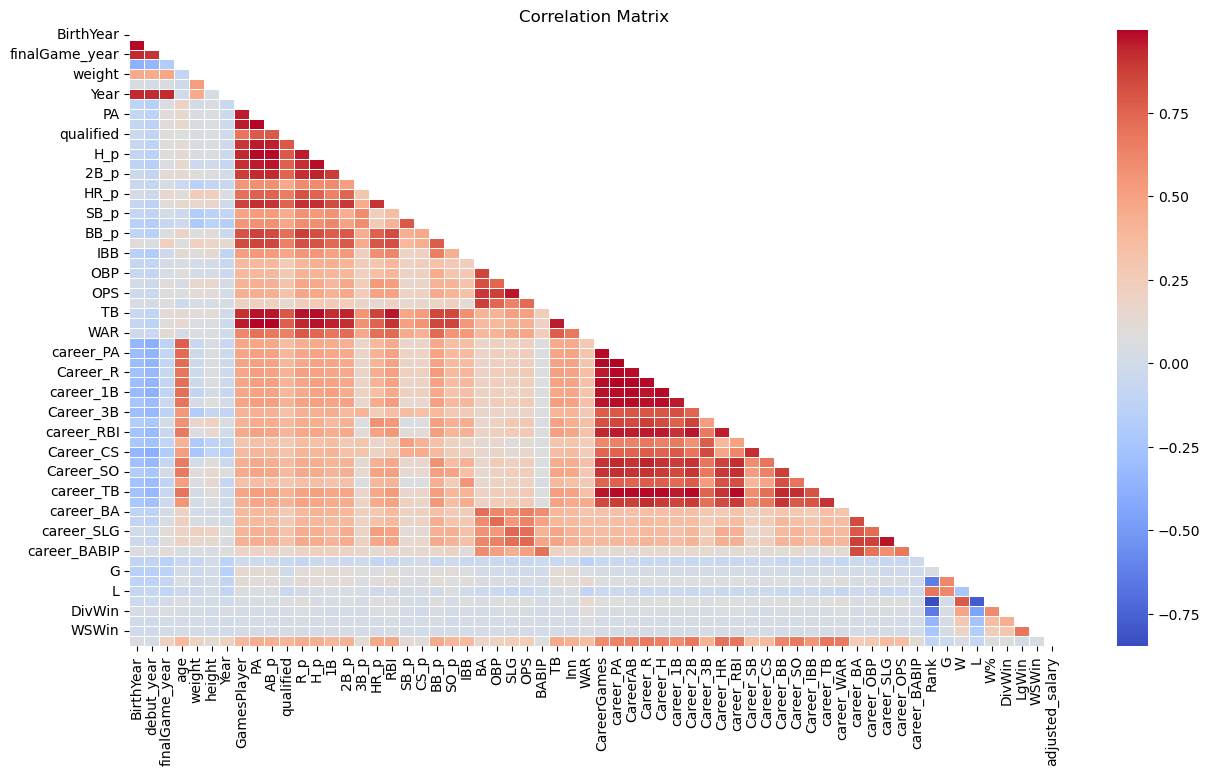

In [53]:
# Correlation matrix
# Mask
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5, mask=mask)
plt.title('Correlation Matrix')

# Save the figure
plt.savefig('Correlation Matrix.png', dpi=300, bbox_inches='tight')

plt.show()

Looking at the heatmap, we can see that many features are highly correlated with each other, as indicated by the dark red areas. Let's these correlations in more detail.

By looking at pairs of variables that have a high correlation (in this case, greater than 0.5), we can identify variables that are potentially causing multicollinearity. If we find variables that are highly correlated, we may decide to remove one from the model in order to improve the model's interpretability and stability.

In [54]:
corr_df = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

# set index to pairs
corr_df.set_index(['pairs'], inplace=True)

# drop level columns
corr_df.drop(columns=['level_1', 'level_0'], inplace=True)

# rename correlation column as cc rather than 0
corr_df.columns = ['cc']

# drop duplicates (we want to avoid repetition in the correlation table)
corr_df.drop_duplicates(inplace=True)

C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_24396\265370723.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)


In [55]:
corr_df[(corr_df['cc'] > 0.8) & (corr_df['cc'] < 1)]

cc
pairs                                 
(CareerAB, career_PA)         0.999083
(AB_p, PA)                    0.998107
(Career_H, CareerAB)          0.995803
(Career_H, career_PA)         0.995115
(Inn, PA)                     0.993832
(Inn, AB_p)                   0.993110
(career_1B, Career_H)         0.990697
(career_PA, CareerGames)      0.989707
(CareerGames, CareerAB)       0.989646
(Career_H, career_TB)         0.989114
(career_PA, career_TB)        0.987867
(Career_R, career_TB)         0.987754
(career_TB, Career_2B)        0.986216
(career_TB, CareerAB)         0.986210
(AB_p, H_p)                   0.986029
(career_1B, CareerAB)         0.985476
(BirthYear, debut_year)       0.985325
(career_RBI, career_TB)       0.985297
(Career_R, career_PA)         0.985216
(Career_H, Career_R)          0.985184
(H_p, PA)                     0.984730
(Career_2B, Career_H)         0.983057
(career_1B, career_PA)        0.982722
(CareerAB, Career_R)          0.980910
(1B, H_p)                     0.980392
(Career_2B, career_PA)        0.979858
(CareerGames, Career_H)       0.979831
(H_p, TB)                     0.979651
(CareerAB, Career_2B)         0.979138
(Inn, H_p)                    0.973286
(Career_2B, Career_R)         0.972601
(TB, PA)                      0.971158
(CareerGames, career_1B)      0.970869
(R_p, TB)                     0.970825
(CareerGames, career_TB)      0.969067
(AB_p, TB)                    0.968646
(OPS, SLG)                    0.966753
(career_RBI, Career_2B)       0.965779
(career_SLG, career_OPS)      0.965208
(career_1B, Career_R)         0.964416
(AB_p, 1B)                    0.964412
(RBI, TB)                     0.963819
(Career_2B, CareerGames)      0.963151
(CareerGames, Career_R)       0.963010
(GamesPlayer, PA)             0.961930
(H_p, R_p)                    0.961852
(AB_p, GamesPlayer)           0.961541
(career_1B, career_TB)        0.960349
(PA, 1B)                      0.959791
(GamesPlayer, Inn)            0.959414
(Inn, TB)                     0.959239
(PA, R_p)                     0.958226
(career_RBI, Career_R)        0.957948
(career_RBI, career_PA)       0.957531
(Career_2B, career_1B)        0.956982
(Career_H, career_RBI)        0.955873
(career_RBI, CareerAB)        0.954026
(career_RBI, Career_HR)       0.952279
(AB_p, R_p)                   0.950391
(1B, Inn)                     0.949289
(TB, 2B_p)                    0.945894
(Career_BB, Career_R)         0.945865
(H_p, 2B_p)                   0.941944
(R_p, Inn)                    0.940234
(career_RBI, CareerGames)     0.938981
(GamesPlayer, H_p)            0.935861
(BirthYear, Year)             0.932248
(Year, finalGame_year)        0.930773
(2B_p, PA)                    0.929641
(AB_p, 2B_p)                  0.929224
(Year, debut_year)            0.929185
(BirthYear, finalGame_year)   0.928722
(career_PA, Career_BB)        0.928561
(Career_BB, career_TB)        0.928337
(career_WAR, Career_R)        0.923125
(TB, 1B)                      0.923079
(Career_SO, career_TB)        0.921845
(career_RBI, Career_SO)       0.919313
(2B_p, Inn)                   0.918874
(career_RBI, Career_BB)       0.918855
(GamesPlayer, 1B)             0.917402
(R_p, 1B)                     0.917369
(GamesPlayer, TB)             0.917172
(R_p, RBI)                    0.916976
(H_p, RBI)                    0.916881
(Career_SB, Career_CS)        0.916696
(PA, RBI)                     0.915224
(2B_p, R_p)                   0.914681
(career_PA, Career_SO)        0.913221
(CareerAB, Career_BB)         0.912242
(RBI, HR_p)                   0.911935
(Career_H, Career_BB)         0.911925
(career_1B, career_RBI)       0.911363
(Career_2B, Career_BB)        0.910364
(finalGame_year, debut_year)  0.910186
(Career_HR, career_TB)        0.910010
(Career_BB, CareerGames)      0.909866
(CareerAB, Career_SO)         0.909849
(AB_p, RBI)                   0.909065
(CareerGames, Career_SO)      0.907775
(Career_R, Career_SO)         0.907349
(Inn, RBI)         

#### Feature Selection

##### Dropping highly correlated features by domain knowledge

__`GamesPlayer`, `AB`, `Inn` and `PA`__

We're dropping `GamesPlayer` because it's a less direct measure of a player's opportunities to contribute to the game. While it's true that players who play in more games have more opportunities, not all games are created equal -- a player might have many opportunities in one game and fewer in another. So this variable could add noise to our model.

We're dropping `AB_p` in favor of `PA` because `PA` provides a more complete picture of a player's opportunities. While `AB_p` only includes the times a player has a chance to hit, `PA` includes all the times a player is at the plate, regardless of the outcome. This could include critical game situations like a walk or a sacrifice, which wouldn't be captured by `AB_p`.

`Inn` is less direct than "PA" in measuring a player's opportunities to contribute to the game. It's possible for a player to play many innings but have fewer plate appearances, depending on the specifics of the game.

In [ ]:
# Create a new dataframe 
df_new = df.copy()

# Drop GamesPlayer and AB_p
df_new.drop(['GamesPlayer', 'AB_p', 'Inn'], axis=1, inplace=True)

# Drop career_G_x, CareerAB
df_new.drop(['CareerGames', 'CareerAB'], axis=1, inplace=True)

__`H` and `1B`,`2B`, `3B`__

Since `1B`, `2B`, and `3B` are components of `H_p`, having them all in the model introduces redundancy. This redundancy can lead to multicollinearity. Dropping `1B`, `2B`, and `3B` simplifies the model without sacrificing too much valuable information, as the general performance of a player in getting on base is still captured by `H_p`. Also, the importance of the type of hit (1B, 2B, 3B, HR) is typically captured by the Slugging Percentage (SLG), which assigns different weights to each type of hit.


In [ ]:
# Drop 1B, 2B, 3B, career_1B, career_2B, career_3B
df_new.drop(['1B', '2B_p', '3B_p', 'career_1B', 'Career_2B', 'Career_3B'], axis=1, inplace=True)

##### Other features to drop

__`qualified` column__

The "qualified" column was created as a binary indicator to identify players who have a certain number of Plate Appearances (PA) in a season. It was a useful feature for exploratory data analysis (EDA), as it allowed for easy filtering and comparison of players who had enough playing time to be considered regular starters (qualified) versus those who didn't.

However, when it comes to building the predictive model, this column is creating some multicollinearity issues. This is because the "qualified" column is highly correlated with the "PA" column, which is a more direct measure of a player's opportunities to contribute to the game. Since we're already including "PA" in the model, we can drop the "qualified" column to avoid multicollinearity.

In [ ]:
# Drop qualified
df_new.drop('qualified', axis=1, inplace=True)

__`CS_p` and `career_CS`__

`CS_p` stands for "Caught Stealing" and `career_CS` stands for "Career Caught Stealing". Both of these metrics reflect how often a player has been caught stealing bases.

As per the correlation list, both `CS_p` and `career_CS` have a relatively low correlation with the `adjusted_salary` (0.10 and 0.37, respectively). This indicates that they might not be strong predictors for the player's salary.

In the context of baseball, being caught stealing is generally considered a negative event for the player and the team. However, the frequency of stealing attempts (and hence the number of times caught) can be heavily influenced by a team's strategy and the specific role of a player on a team. Thus, it might not necessarily reflect a player's overall performance or value, and hence might not be a strong predictor of salary.

Also, if base stealing attempts are relatively rare events for most players, these columns could be mostly populated with zeros or low numbers, leading to a skewed distribution that might not be very informative for a linear regression model.


In [ ]:
# Drop CS_p and career_CS
df_new.drop(['CS_p', 'Career_CS'], axis=1, inplace=True)

##### Combining features

`BirthYear`, `debut_year` and `finalGame_year` are also creating some multicollinearity. We can combine `DebutYear` and `Year` (Season year) in a single column called `career_length` that represents the number of years a player has been active in the league. This will allow us to drop `DebutYear` and `finalGame_year` from the model.

In [ ]:
# Create career_lenght column
df_new['career_length'] = df_new['Year'] - df_new['debut_year']

# Drop debut_year, finalGame_year and BirthYear
df_new.drop(['debut_year', 'finalGame_year', 'BirthYear'], axis=1, inplace=True)

In [ ]:
# Aaron Judge
df_new[df_new['playerID'] == 'judgeaa01']

playerID  name_common   age  weight  height bats throws POS    Year  \
18318  judgeaa01  Aaron Judge  24.0   282.0    79.0    R      R  OF  2016.0   
18939  judgeaa01  Aaron Judge  25.0   282.0    79.0    R      R  OF  2017.0   
19552  judgeaa01  Aaron Judge  26.0   282.0    79.0    R      R  OF  2018.0   
20170  judgeaa01  Aaron Judge  27.0   282.0    79.0    R      R  OF  2019.0   
20790  judgeaa01  Aaron Judge  28.0   282.0    79.0    R      R  OF  2020.0   
21360  judgeaa01  Aaron Judge  29.0   282.0    79.0    R      R  OF  2021.0   

          PA    R_p    H_p  HR_p    RBI  SB_p   BB_p   SO_p   IBB     BA  \
18318   95.0   10.0   15.0   4.0   10.0   0.0    9.0   42.0   0.0  0.179   
18939  678.0  128.0  154.0  52.0  114.0   9.0  127.0  208.0  11.0  0.284   
19552  498.0   77.0  115.0  27.0   67.0   6.0   76.0  152.0   3.0  0.278   
20170  447.0   75.0  103.0  27.0   55.0   3.0   64.0  141.0   4.0  0.272   
20790  114.0   23.0   26.0   9.0   22.0   0.0   10.0   32.0   0.0  0.257   
21360  633.0   89.0  158.0  39.0   98.0   6.0   75.0  158.0   2.0  0.287   

         OBP    SLG    OPS  BABIP     TB   WAR  career_PA  Career_R  Career_H  \
18318  0.263  0.345  0.608  0.282   29.0 -0.29         95        10        15   
18939  0.422  0.627  1.049  0.357  340.0  7.99        773       138       169   
19552  0.392  0.528  0.920  0.368  218.0  5.87       1271       215       284   
20170  0.381  0.540  0.921  0.360  204.0  5.61       1718       290       387   
20790  0.336  0.554  0.890  0.283   56.0  1.14       1832       313       413   
21360  0.373  0.544  0.917  0.332  299.0  6.07       2465       402       571   

       Career_HR  career_RBI  Career_SB  Career_BB  Career_SO  Career_IBB  \
18318          4          10          0          9         42           0   
18939         56         124          9        136        250          11   
19552         83         191         15        212        402          14   
20170        110         246         18        276        543          18   
20790        119         268         18        286        575          18   
21360        158         366         24        361        733          20   

       career_TB  career_WAR  career_BA  career_OBP  career_SLG  career_OPS  \
18318         29       -0.29      0.179       0.263       0.345       0.608   
18939        369        7.70      0.270       0.402       0.589       0.991   
19552        587       13.57      0.273       0.398       0.565       0.963   
20170        791       19.18      0.273       0.394       0.558       0.952   
20790        847       20.32      0.272       0.390       0.558       0.948   
21360       1146       26.39      0.276       0.386       0.554       0.940   

       career_BABIP          teamName  Rank      G      W     L     W%  \
18318         0.282  New York Yankees   4.0  162.0   84.0  78.0  0.519   
18939         0.348  New York Yankees   2.0  162.0   91.0  71.0  0.562   
19552         0.356  New York Yankees   2.0  162.0  100.0  62.0  0.617   
20170         0.357  New York Yankees   1.0  162.0  103.0  59.0  0.636   
20790         0.352  New York Yankees   2.0   60.0   33.0  27.0  0.550   
21360         0.346  New York Yankees   2.0  162.0   92.0  70.0  0.568   

       DivWin  LgWin  WSWin  adjusted_salary  career_length  
18318       0      0      0         654675.0            0.0  
18939       0      0      0         686070.0            1.0  
19552       0      0      0         765429.0            2.0  
20170       1      0      0         828003.0            3.0  
20790       0      0      0       10030000.0            4.0  
21360       0      0      0       11904750.0            5.0

In [ ]:
# # Save new dataframe
# df_new.to_csv('baseball_salaries_premodel.csv', index=False)

##### Final Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=10)

df_select = df_new.drop(['adjusted_salary', 'playerID', 'name_common', 'bats', 'throws', 'POS', 'teamName'], axis=1)

selector.fit(df_select, df_new['adjusted_salary'])

# Top features
top_features = df_select.columns[selector.get_support()]

top_features

Index(['career_PA', 'Career_R', 'Career_H', 'Career_HR', 'career_RBI',
       'Career_BB', 'Career_SO', 'Career_IBB', 'career_TB', 'career_WAR'],
      dtype='object')

In [ ]:
# New dataframe with top features plus other feature from domain knowledge
df_top = df_new.copy()
df_top = df_new[['playerID', 'name_common', 'Year', 'adjusted_salary', 'age', 'career_length', 'bats', 'throws', 'POS', 'teamName'] + list(top_features)]


In [ ]:
df_top.columns

Index(['playerID', 'name_common', 'Year', 'adjusted_salary', 'age',
       'career_length', 'bats', 'throws', 'POS', 'teamName', 'career_PA',
       'Career_R', 'Career_H', 'Career_HR', 'career_RBI', 'Career_BB',
       'Career_SO', 'Career_IBB', 'career_TB', 'career_WAR'],
      dtype='object')

In [ ]:
df_top.shape

(22010, 19)

In [ ]:
df_top.head()

playerID  name_common    Year  adjusted_salary   age  career_length bats  \
0  bumbral01    Al Bumbry  1985.0         462400.0  38.0           13.0    L   
1  chambal01  Al Chambers  1985.0         173400.0  24.0            2.0    L   
2  cowenal01    Al Cowens  1985.0        1156000.0  33.0           11.0    R   
3  newmaal01    Al Newman  1985.0         173400.0  25.0            0.0    B   
4  oliveal01    Al Oliver  1985.0        2167500.0  38.0           17.0    L   

  throws POS              teamName  career_PA  Career_R  Career_H  Career_HR  \
0      R  OF      San Diego Padres       5619       778      1422         54   
1      L  OF      Seattle Mariners        141        15        25          2   
2      R  OF      Seattle Mariners       5951       699      1479        108   
3      R  2B  Washington Nationals         32         7         5          0   
4      L  OF   Los Angeles Dodgers       9778      1189      2743        219   

   career_RBI  Career_BB  Career_SO  Career_IBB  career_TB  career_WAR  
0         402        471        709          30       1908       24.48  
1          11         21         34           1         35       -0.38  
2         711        386        641          28       2211       16.17  
3           1          3          4           0          6       -0.25  
4        1326        535        756         119       4083       43.62

In [ ]:
# Save dataframe
df_top.to_csv('baseball_salaries_top_features.csv', index=False)

In [ ]:
# df with 2022 players

## 8. Conclusion

In conclusion, this detailed exploratory data analysis provides valuable insights into the factors that influence player salaries in Major League Baseball (MLB). The data spans multiple years and covers a wide range of player demographics, performance metrics, and team characteristics.

Key findings include:

- Salary Distribution: MLB player salaries have a wide range, with a significant right skewness indicating a small number of players earning exceptionally high salaries.

- Demographic Factors: Age, position, and career length all have a noticeable impact on salary. Players tend to earn the highest salaries around their mid-30s, and certain positions, like First Baseman and Shortstop, are associated with higher average salaries.

- Performance Metrics: Metrics such as Batting Average (BA), On-Base Plus Slugging (OPS), Home Runs (HR), and Runs Batted In (RBI) all show a positive correlation with player salaries, both on a per-season basis and averaged over a player's career. This suggests that players with better offensive performance generally earn higher salaries.

- Consistency: The number of Plate Appearances (PA) per season, indicative of a player's involvement in games, is also positively correlated with salary, indicating the importance of consistent performance.

- Correlation and Multicollinearity: A correlation analysis revealed several performance metrics that are strongly correlated with salary, including career statistics like home runs and runs batted in. However, multicollinearity was also identified among several features, prompting the need for careful feature selection and engineering.

- Feature Selection: The use of SelectKBest method and domain knowledge led to the identification of a set of features that will be used for building a predictive model. 

Moving forward, these insights and selected features will be used to create a predictive model for player salaries. This model could be an invaluable tool for team management and player agents in salary negotiations and strategic planning. It also contributes to a greater understanding of the economics of professional baseball.






---
---


In [ ]:
# For each player, move the adjusted salary one year into the future
# df['adjusted_salary_next_year'] = df.groupby('playerID')['adjusted_salary'].shift(-1)

# # Drop rows with null values
# df.dropna(inplace=True)

# # Save dataframe
# df.to_csv('baseballsalaries_1985_moved.csv', index=False)

In [ ]:
# null values
# df['adjusted_salary_next_year'].isnull().sum()

In [ ]:
# Derek Jeter
df_new[df_new['playerID'] == 'jeterde01']

playerID  name_common   age  weight  height bats throws POS    Year  \
5601   jeterde01  Derek Jeter  21.0   195.0    75.0    R      R  SS  1995.0   
6180   jeterde01  Derek Jeter  22.0   195.0    75.0    R      R  SS  1996.0   
6773   jeterde01  Derek Jeter  23.0   195.0    75.0    R      R  SS  1997.0   
7361   jeterde01  Derek Jeter  24.0   195.0    75.0    R      R  SS  1998.0   
7992   jeterde01  Derek Jeter  25.0   195.0    75.0    R      R  SS  1999.0   
8609   jeterde01  Derek Jeter  26.0   195.0    75.0    R      R  SS  2000.0   
9241   jeterde01  Derek Jeter  27.0   195.0    75.0    R      R  SS  2001.0   
9847   jeterde01  Derek Jeter  28.0   195.0    75.0    R      R  SS  2002.0   
10447  jeterde01  Derek Jeter  29.0   195.0    75.0    R      R  SS  2003.0   
11065  jeterde01  Derek Jeter  30.0   195.0    75.0    R      R  SS  2004.0   
11666  jeterde01  Derek Jeter  31.0   195.0    75.0    R      R  SS  2005.0   
12275  jeterde01  Derek Jeter  32.0   195.0    75.0    R      R  SS  2006.0   
12875  jeterde01  Derek Jeter  33.0   195.0    75.0    R      R  SS  2007.0   
13502  jeterde01  Derek Jeter  34.0   195.0    75.0    R      R  SS  2008.0   
14130  jeterde01  Derek Jeter  35.0   195.0    75.0    R      R  SS  2009.0   
14733  jeterde01  Derek Jeter  36.0   195.0    75.0    R      R  SS  2010.0   
15357  jeterde01  Derek Jeter  37.0   195.0    75.0    R      R  SS  2011.0   
15987  jeterde01  Derek Jeter  38.0   195.0    75.0    R      R  SS  2012.0   
16611  jeterde01  Derek Jeter  39.0   195.0    75.0    R      R  SS  2013.0   
17243  jeterde01  Derek Jeter  40.0   195.0    75.0    R      R  SS  2014.0   

          PA    R_p    H_p  HR_p    RBI  SB_p  BB_p   SO_p  IBB     BA    OBP  \
5601    51.0    5.0   12.0   0.0    7.0   0.0   3.0   11.0  0.0  0.250  0.294   
6180   654.0  104.0  183.0  10.0   78.0  14.0  48.0  102.0  1.0  0.314  0.370   
6773   748.0  116.0  190.0  10.0   70.0  23.0  74.0  125.0  0.0  0.291  0.370   
7361   694.0  127.0  203.0  19.0   84.0  30.0  57.0  119.0  1.0  0.324  0.384   
7992   739.0  134.0  219.0  24.0  102.0  19.0  91.0  116.0  5.0  0.349  0.438   
8609   679.0  119.0  201.0  15.0   73.0  22.0  68.0   99.0  4.0  0.339  0.416   
9241   686.0  110.0  191.0  21.0   74.0  27.0  56.0   99.0  3.0  0.311  0.377   
9847   730.0  124.0  191.0  18.0   75.0  32.0  73.0  114.0  2.0  0.297  0.373   
10447  542.0   87.0  156.0  10.0   52.0  11.0  43.0   88.0  2.0  0.324  0.393   
11065  721.0  111.0  188.0  23.0   78.0  23.0  46.0   99.0  1.0  0.292  0.352   
11666  752.0  122.0  202.0  19.0   70.0  14.0  77.0  117.0  3.0  0.309  0.389   
12275  715.0  118.0  214.0  14.0   97.0  34.0  69.0  102.0  4.0  0.343  0.417   
12875  714.0  102.0  206.0  12.0   73.0  15.0  56.0  100.0  3.0  0.322  0.388   
13502  668.0   88.0  179.0  11.0   69.0  11.0  52.0   85.0  0.0  0.300  0.363   
14130  716.0  107.0  212.0  18.0   66.0  30.0  72.0   90.0  4.0  0.334  0.406   
14733  739.0  111.0  179.0  10.0   67.0  18.0  63.0  106.0  4.0  0.270  0.340   
15357  607.0   84.0  162.0   6.0   61.0  16.0  46.0   81.0  0.0  0.297  0.355   
15987  740.0   99.0  216.0  15.0   58.0   9.0  45.0   90.0  1.0  0.316  0.362   
16611   73.0    8.0   12.0   1.0    7.0   0.0   8.0   10.0  1.0  0.190  0.288   
17243  634.0   47.0  149.0   4.0   50.0  10.0  35.0   87.0  0.0  0.256  0.304   

         SLG    OPS  BABIP     TB   WAR  career_PA  Career_R  Career_H  \
5601   0.375  0.669  0.324   18.0 -0.34         51         5        12   
6180   0.430  0.800  0.361  250.0  3.29        705       109       195   
6773   0.405  0.775  0.345  265.0  4.96       1453       225       385   
7361   0.481  0.865  0.375  301.0  7.53       2147       352       588   
7992   0.552  0.990  0.396  346.0  8.00       2886       486       807   
8609   0.481  0.897  0.386  285.0  4.57       3565       605      1008   
9241   0.480  0.857  0.343  295.0  5.19       4251       715      1199   
9847   0.421  0.794  0.336  271.0  3.67       4981    